#### 1. Refer to this section for a description of the problem

__[Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)__ platform provides two datasets (_train.csv_, _test.csv_) containing information about houses, such as :

- _Id_ : an unique identifier for each property ; 
- _MSSubClass_ : the type of dwelling involved in the property sale ;
- _MSZoning_ : the general zoning classification of the property sale ;
- _LotFrontage_ : the linear feet of street connected to the property ;
- _LotArea_ : the lot size in square feet ;
- _Street_ : the type of road access to the property ;
- _Alley_ : the type of alley access to the property ;
- _LotShape_ : the general shape of the property ;
- _LandContour_ : the flatness of the property ;
- _Utilities_ : the type of utilities available in the property ;
- _LotConfig_ : the lot configuration of the property ;	
- _LandSlope_ : the slope of the property ;
- _Neighborhood_ : the physical locations within Ames city limits ;
- _Condition1_ : the proximity to various conditions ;
- _Condition2_ : the proximity to various conditions (if more than one is present) ;
- _BldgType_ : the type of dwelling ;
- _HouseStyle_ : the style of dwelling ;
- _OverallQual_ : rates the overall material and finish of the house ;	
- _OverallCond_ : rates the overall condition of the house ;
- _YearBuilt_ : the original construction date ;
- _YearRemodAdd_ : the remodel date (same as construction date if no remodeling or additions) ;
- _RoofStyle_ : the type of roof ;
- _RoofMatl_ : the roof material ;
- _Exterior1st_ : the exterior covering on house ;
- _Exterior2nd_ : the exterior covering on house (if more than one material) ;
- _MasVnrType_ : the masonry veneer type ;
- _MasVnrArea_ : the masonry veneer area in square feet ;
- _ExterQual_ : the quality of the material on the exterior ;
- _ExterCond_ : the present condition of the material on the exterior ;
- _Foundation_ : the type of foundation ;
- _BsmtQual_ : the height of the basement ;
- _BsmtCond_ : the general condition of the basement ;
- _BsmtExposure_ : refers to walkout or garden level walls ;
- _BsmtFinType1_ : the rating of basement finished area ;
- _BsmtFinType2_: the rating of basement finished area (if multiple types) ;
- _BsmtFinSF1_ : Type 1 finished square feet ;
- _BsmtFinSF2_ : Type 2 finished square feet ;
- _BsmtUnfSF_ : the unfinished square feet of basement area ;
- _TotalBsmtSF_ : the total square feet of basement area ;
- _Heating_ : the type of heating ;
- _HeatingQC_ : the heating quality and condition ;		
- _CentralAir_ : the central air conditioning ;
- _Electrical_ : the electrical system ;		
- _1stFlrSF_ : the first floor square feet ;
- _2ndFlrSF_ : the second floor square feet ;
- _LowQualFinSF_ : the low quality finished square feet (all floors) ;
- _GrLivArea_ : the above grade (ground) living area square feet ;
- _BsmtFullBath_ : the basement full bathrooms ;
- _BsmtHalfBath_ : the basement half bathrooms ;
- _FullBath_ : the full bathrooms above grade ;
- _HalfBath_ : the half baths above grade ;
- _Bedroom_ : the bedrooms above grade (does not include basement bedrooms) ;
- _Kitchen_ : the kitchens above grade ;
- _KitchenQual_ : the kitchen quality ;       	
- _TotRmsAbvGrd_ : the total rooms above grade (does not include bathrooms) ;
- _Functional_ : the home functionality (Assume typical unless deductions are warranted) ;		
- _Fireplaces_ : the number of fireplaces ;
- _FireplaceQu_ : the fireplace quality ;
- _GarageType_ : the garage location ;
- _GarageYrBlt_ : the year in which the garage was built ;
- _GarageFinish_ : the interior finish of the garage ;
- _GarageCars_ : the size of garage in car capacity ;
- _GarageArea_ : the size of garage in square feet ;
- _GarageQual_ : the garage quality ;
- _GarageCond_ : the garage condition ;
- _PavedDrive_ : the paved driveway ;
- _WoodDeckSF_ : the wood deck area in square feet ;
- _OpenPorchSF_ : the open porch area in square feet ;
- _EnclosedPorch_ : the enclosed porch area in square feet ;
- _3SsnPorch_ : the three season porch area in square feet ;
- _ScreenPorch_ : the screen porch area in square feet ;
- _PoolArea_ : the pool area in square feet ;
- _PoolQC_ : the pool quality ;
- _Fence_ : the fence quality ;
- _MiscFeature_ : the miscellaneous feature not covered in other categories ;
- _MiscVal_ : the $value of miscellaneous feature ;
- _MoSold_ : the month sold (MM)
- _YrSold_ : the year sold (YYYY) ;
- _SaleType_ : the type of sale ;
- _SaleCondition_ : the condition of sale ;
- The property sale price (_SalePrice_) in dollars, which is available only for samples in _train.csv_.

Based on the data and relationships identified in the _train.csv_ file, we aim to predict sales prices of houses listed in _test.csv_ file.

#### 2. Import required libraries

In [1782]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA, SparsePCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import gc, pandas as pd, numpy as np
from pathlib import Path
import xgboost as xgb

#### 3. Set up correct path

In [1783]:
windowspath__scripts = Path().resolve()
windowspath__data = windowspath__scripts.parent / "data"

#### 4. Import train.csv and test.csv files

In [1784]:
df__train = pd.read_csv(filepath_or_buffer=windowspath__data / "train" / "train.csv", dtype=str)
df__test = pd.read_csv(filepath_or_buffer=windowspath__data / "test" / "test.csv", dtype=str)

In [1785]:
# Take a look at df__train
df__train.sample(n=3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
797,798,20,RL,57,7677,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,110000
1119,1120,20,RL,70,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Normal,133700
765,766,20,RL,75,14587,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,264132


In [1786]:
# Get a list of df__train "Id"
list__trainids = df__train["Id"].tolist()

In [1787]:
# Set "SalePrice" data type to float
df__train["SalePrice"] = df__train["SalePrice"].astype(float)

In [1788]:
# Take a look at df__test
df__test.sample(n=3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1002,2463,50,RM,51,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1046,2507,20,RL,93,10481,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,New,Partial
1303,2764,20,RL,86,11650,Pave,NaN,Reg,Lvl,AllPub,...,227,0,NaN,NaN,NaN,0,6,2006,WD,Normal


In [1789]:
# Get a list of df__test "Id"
list__testids = df__test["Id"].tolist()

Other than "SalePrice" (which we call target) and "Id", all others features will be called covariates.

#### 5. Feature engineering (using some of the relations between covariates)

In [1790]:
# Define an unified view of df__train and df__test
df__houses = pd.concat([df__train.copy(deep=True).drop(columns=["SalePrice"]), df__test.copy(deep=True)], ignore_index=True)

# Do not forget that samples of df__train and df__test are identified by their Id,
# and initially that both datasets are one whole.

# Take a look at df__houses
df__houses.sample(n=3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
686,687,60,FV,84,10207,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,New,Partial
270,271,60,FV,84,10728,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2006,New,Partial
338,339,20,RL,91,14145,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,400,5,2006,WD,Normal


In [1791]:
# Detect which covariates have NA values
list__columnswithNA = df__houses.columns[df__houses.isnull().any()].tolist()
list__columnswithoutNA = df__houses.columns[~(df__houses.columns.isin(list__columnswithNA))].tolist()

We will start our processing with covariates without NA, then go later to those having NA values.

##### *5.1. Covariates without missing values*

##### 5.1.1. "MSSubClass" : type of dwelling involved in the sale

<Axes: title={'center': 'MSSubClass count distribution'}, xlabel='MSSubClass'>

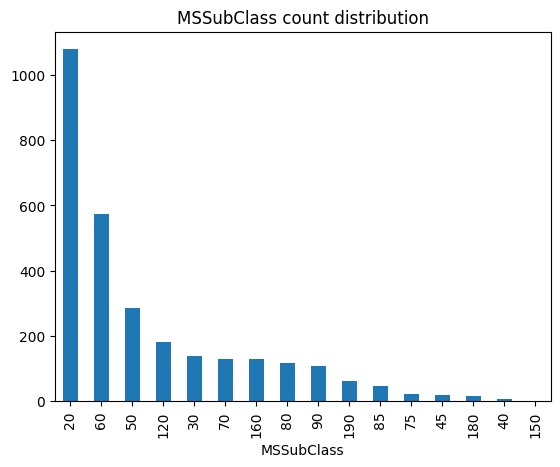

In [1792]:
# Take a look at "MSSubClass"
df__houses["MSSubClass"].value_counts().plot(kind="bar", title="MSSubClass count distribution")

In [1793]:
# Take a look at "MSSubClass"
100*df__houses["MSSubClass"].value_counts()/df__houses["MSSubClass"].value_counts().sum()

MSSubClass
20     36.964714
60     19.698527
50      9.832134
120     6.235012
30      4.761905
70      4.385063
160     4.385063
80      4.042480
90      3.734156
190     2.089757
85      1.644399
75      0.787941
45      0.616650
180     0.582391
40      0.205550
150     0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- The most dominant/used types of dwelling are "20", "60" : they can be regrouped as "Frequent" (at least 10% of the whole set for each).
- There are also rare types of dwelling such as "75", "45", "180", "40", "150" : they can be regrouped as "Rare" (less than 1% of the whole set for each).
- Other types of dwelling can be seen as "Moderate" (at least 1% and less than 10% of the whole set for each).

We will transform "MSSubClass" into a new categorical variable called "DwellingType" with less granularity having three modalities "Frequent", "Moderate" and "Rare".
</div>

In [1794]:
# Transform "MSSubClass"
df__houses["DwellingType"] = df__houses["MSSubClass"].apply(
    lambda x: "Frequent" if x in ["20", "60"] else "Rare" if x in ["75", "45", "180", "40", "150"] else "Moderate")

# Cleanup
del df__houses["MSSubClass"]

<Axes: title={'center': 'DwellingType count distribution'}, xlabel='DwellingType'>

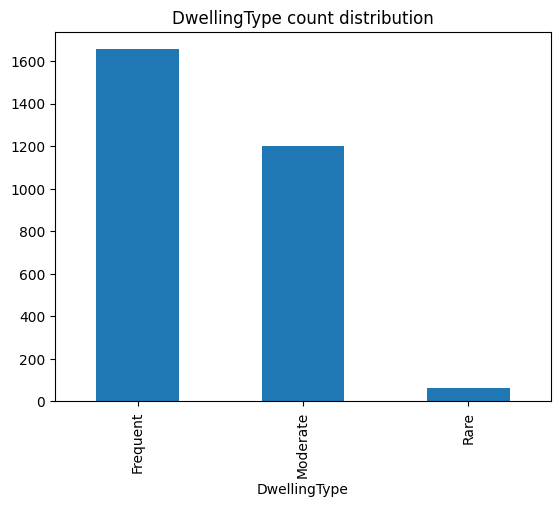

In [1795]:
# "DwellingType" count distribution
df__houses["DwellingType"].value_counts().plot(kind="bar", title="DwellingType count distribution")

##### 5.1.2. "LotArea" : lot size in square feet

In [1796]:
# Convert "LotAre" data type into float
df__houses["LotArea"] = df__houses["LotArea"].astype(float)

<Axes: title={'center': 'LotArea distribution'}, ylabel='Frequency'>

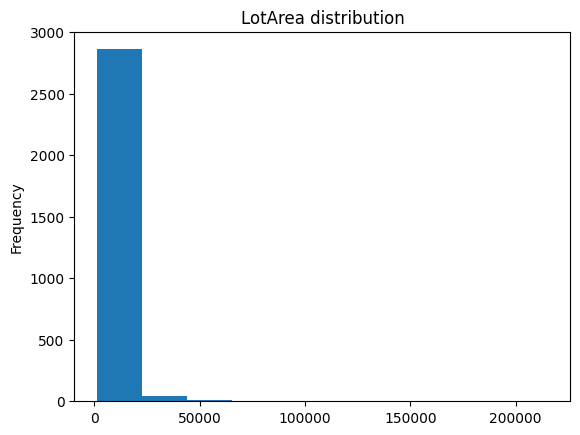

In [1797]:
# Take a look at "LotArea"
df__houses["LotArea"].plot(kind="hist", title="LotArea distribution")

In [1798]:
# Take a look at "LotArea"
df__houses["LotArea"].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

In [1799]:
# Determine an optimal cutoff to separate houses with "small" lot area from houses with "medium" lot area
list__quantileorders = list(np.linspace(0.5, 0.75, num=20))
df__houses["LotArea"].quantile(list__quantileorders)

0.500000     9453.000000
0.513158     9554.394737
0.526316     9600.000000
0.539474     9663.473684
0.552632     9760.000000
0.565789     9862.868421
0.578947     9987.473684
0.592105    10120.000000
0.605263    10197.473684
0.618421    10305.657895
0.631579    10400.000000
0.644737    10500.000000
0.657895    10625.000000
0.671053    10768.131579
0.684211    10820.000000
0.697368    10989.526316
0.710526    11081.263158
0.723684    11235.000000
0.736842    11382.631579
0.750000    11570.000000
Name: LotArea, dtype: float64

In [1800]:
# Cleanup
del list__quantileorders

In [1801]:
# Determine an optimal cutoff to separate houses with "big" lot area from houses with "medium" lot area
list__quantileorders = list(np.linspace(0.98, 1, num=20))
df__houses["LotArea"].quantile(list__quantileorders)

0.980000     22857.120000
0.981053     23500.107368
0.982105     23878.800000
0.983158     24666.021053
0.984211     25271.926316
0.985263     25484.861053
0.986316     26193.423158
0.987368     27838.193684
0.988421     31226.378947
0.989474     32521.263158
0.990526     34220.311579
0.991579     36076.252632
0.992632     39336.901053
0.993684     42684.000000
0.994737     46857.400000
0.995789     50222.612632
0.996842     53201.231579
0.997895     57114.105263
0.998947    111971.753684
1.000000    215245.000000
Name: LotArea, dtype: float64

In [1802]:
# Cleanup
del list__quantileorders

<div style="background-color: green; padding: 10px;">

- From the min (1300) up to the quantile of order 0.578947 (9987.473684), houses lot area remain of the same order : houses with "small" lot area ;
- Then, from the quantile of order 0.592105 (10120) to the quantile of order 0.997895 (57114.105263), houses lot area also remain of the same order : houses with "medium" lot area ;
- Finally, starting from the quantile of order 0.998947 (111971.753684), we have houses with "huge" lot area.

We will transform "LotArea" into a new covariate called "LotAreaTransformed" : we estimate a false min lot 2 times less than the actual min and a false max lot area up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.
</div>

In [1803]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["LotArea"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["LotArea"].max()

# Set an initial value to "LotAreaTransformed"
df__houses["LotAreaTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "LotAreaTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "LotArea"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "LotAreaTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "LotArea"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
del float__falsemin, float__falsemax, df__houses["LotArea"]

In [1804]:
# Take a look at "LotAreaTransformed"
df__houses["LotAreaTransformed"].describe()

count    2919.000000
mean        0.022143
std         0.018349
min         0.001512
25%         0.015885
50%         0.020480
75%         0.025405
max         0.499244
Name: LotAreaTransformed, dtype: float64

##### 5.1.3. "Street" : type of road access

<Axes: title={'center': 'Street count distribution'}, xlabel='Street'>

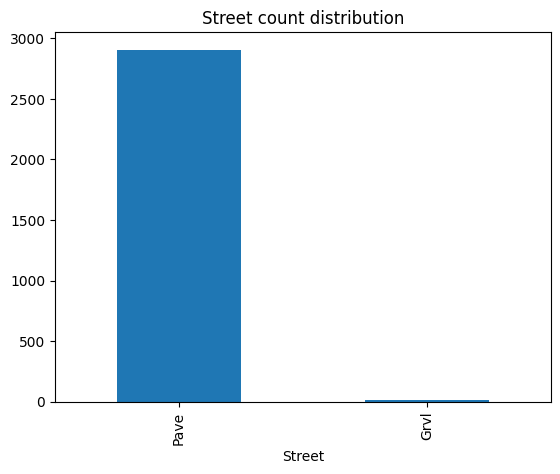

In [1805]:
# Take a look at "Street"
df__houses["Street"].value_counts().plot(kind="bar", title="Street count distribution")

In [1806]:
# Take a look at "Street"
100*df__houses["Street"].value_counts() / df__houses["Street"].value_counts().sum()

Street
Pave    99.5889
Grvl     0.4111
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Less than 1% of the houses have a gravel road as a street access. We discard this covariate since only "Pave" (one of its modalities)  is well represented.
</div>

In [1807]:
# Cleanup
del df__houses["Street"]

##### 5.1.4. "LotShape" : general shape

<Axes: title={'center': 'LotShape count distribution'}, xlabel='LotShape'>

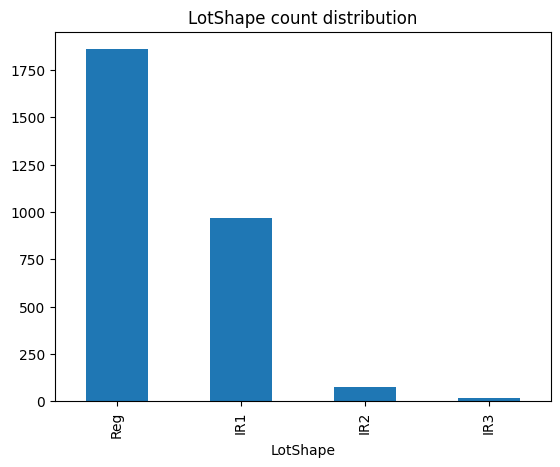

In [1808]:
# Take a look at "LotShape"
df__houses["LotShape"].value_counts().plot(kind="bar", title="LotShape count distribution")

In [1809]:
# Take a look at "LotShape"
100*df__houses["LotShape"].value_counts() / df__houses["LotShape"].value_counts().sum()

LotShape
Reg    63.686194
IR1    33.162042
IR2     2.603631
IR3     0.548133
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- Most of the properties have a regular shape (63.67%).
- The slightly irregular properties are the second most dominant (33.16%), then we have the moderately irregular and finally the most irregular one.
- We will regroup all irregular as one modality called "Irregular".
</div>

In [1810]:
# Regroup all irregular lot shape
df__houses["LotShapeTransformed"] = df__houses["LotShape"].apply(lambda x: "Irregular" if x in ["IR1", "IR2", "IR3"] else x)

# Cleanup
del df__houses["LotShape"]

<Axes: title={'center': 'LotShapeTransformed count distribution'}, xlabel='LotShapeTransformed'>

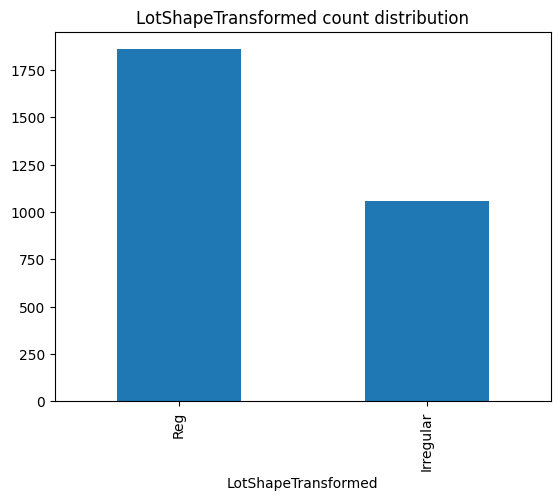

In [1811]:
# Take a look at "LotShapeTransformed"
df__houses["LotShapeTransformed"].value_counts().plot(kind="bar", title="LotShapeTransformed count distribution")

##### 5.1.5. "LandContour" : flatness

<Axes: title={'center': 'LandContour count distribution'}, xlabel='LandContour'>

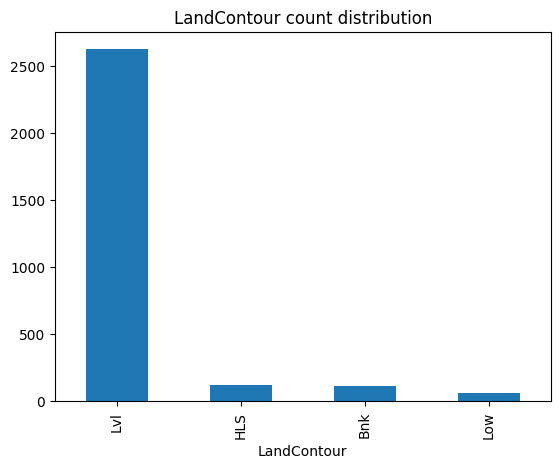

In [1812]:
# Take a look at "LandContour"
df__houses["LandContour"].value_counts().plot(kind="bar", title="LandContour count distribution")

In [1813]:
# Take a look at "LandContour"
100*df__houses["LandContour"].value_counts() / df__houses["LandContour"].value_counts().sum()

LandContour
Lvl    89.825283
HLS     4.110997
Bnk     4.008222
Low     2.055498
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- Most of the properties a land contour which is nearly flat (89.83%).
- Other types of land contour represent each, less than 5% of the whole set and at least 2%.
</div>

##### 5.1.6. "LotConfig" : lot configuration

<Axes: title={'center': 'LotConfig count distribution'}, xlabel='LotConfig'>

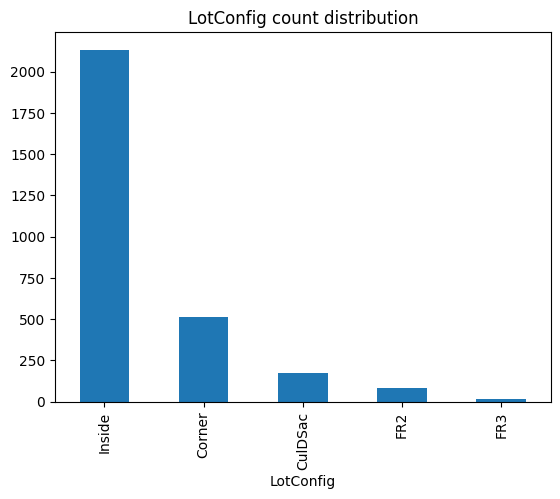

In [1814]:
# Take a look at "LotConfig"
df__houses["LotConfig"].value_counts().plot(kind="bar", title="LotConfig count distribution")

In [1815]:
# Take a look at "LotConfig"
100*df__houses["LotConfig"].value_counts() / df__houses["LotConfig"].value_counts().sum()

LotConfig
Inside     73.072970
Corner     17.505995
CulDSac     6.029462
FR2         2.911956
FR3         0.479616
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- Most of the properties an inside lot configuration (73.07%).
- The second most dominant ot configuration is "Corner", than we have "CulDSac".
- The least present lot configuration are frontage (on 2 and 3 sides property) : we regroup these last two as one modality called "Frontage".
</div>

In [1816]:
# Regroup "FR2" and "FR3" as "Frontage"
df__houses["LotConfigTransformed"] = df__houses["LotConfig"].apply(lambda x: "Frontage" if x in ["FR2", "FR3"] else x)

# Cleanup
del df__houses["LotConfig"]

<Axes: title={'center': 'LotConfigTransformed count distribution'}, xlabel='LotConfigTransformed'>

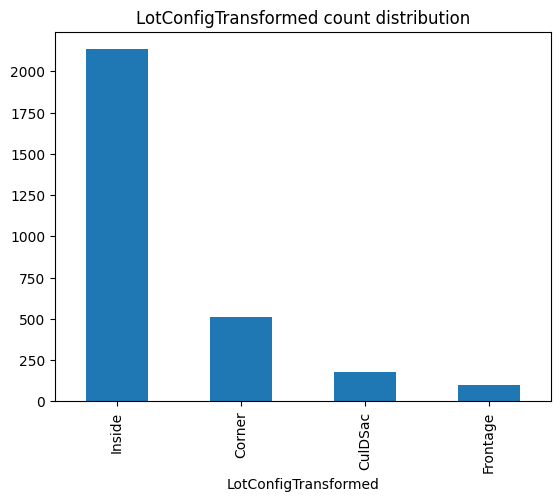

In [1817]:
# Take a look at "LotConfigTransformed"
df__houses["LotConfigTransformed"].value_counts().plot(kind="bar", title="LotConfigTransformed count distribution")

##### 5.1.7. "LandSlope" : slope

<Axes: title={'center': 'LandSlope count distribution'}, xlabel='LandSlope'>

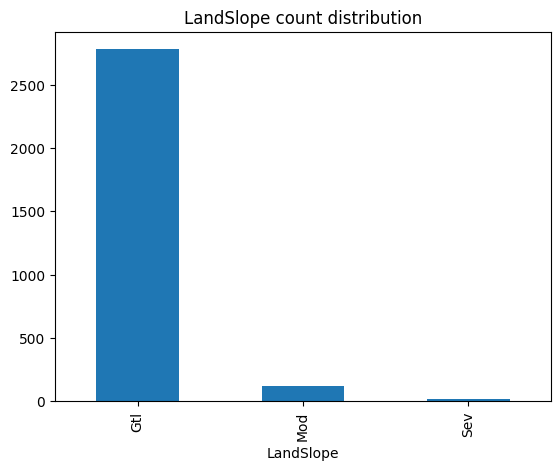

In [1818]:
# Take a look at "LandSlope"
df__houses["LandSlope"].value_counts().plot(kind="bar", title="LandSlope count distribution")

In [1819]:
# Take a look at "LandSlope"
100*df__houses["LandSlope"].value_counts() / df__houses["LandSlope"].value_counts().sum()

LandSlope
Gtl    95.169579
Mod     4.282288
Sev     0.548133
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- Most of the properties a gentle slope (95.17%).
- Both other types of slopes represent in global, less than 5% of the whole set.

Since only one of the slope modality is really present, we discard this covariate.
</div>

In [1820]:
# Cleanup
del df__houses["LandSlope"]

##### 5.1.8. "Neighborhood" : physical locations within Ames city limits

<Axes: title={'center': 'Neighborhood count distribution'}, xlabel='Neighborhood'>

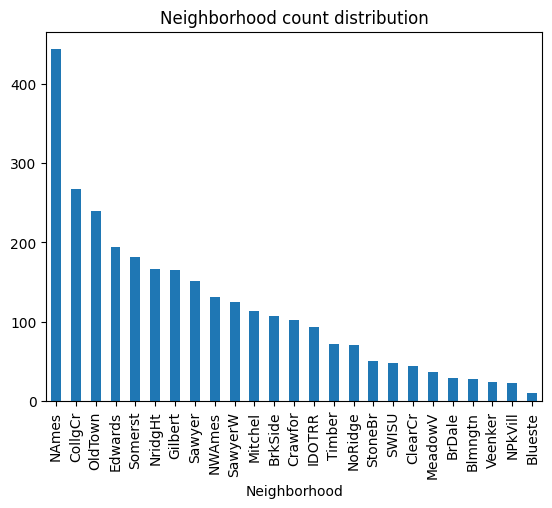

In [1821]:
# Take a look at "Neighborhood"
df__houses["Neighborhood"].value_counts().plot(kind="bar", title="Neighborhood count distribution")

In [1822]:
# Take a look at "Neighborhood"
100*df__houses["Neighborhood"].value_counts() / df__houses["Neighborhood"].value_counts().sum()

Neighborhood
NAmes      15.176430
CollgCr     9.146968
OldTown     8.187736
Edwards     6.646112
Somerst     6.235012
NridgHt     5.686879
Gilbert     5.652621
Sawyer      5.173004
NWAmes      4.487838
SawyerW     4.282288
Mitchel     3.905447
BrkSide     3.699897
Crawfor     3.528606
IDOTRR      3.186023
Timber      2.466598
NoRidge     2.432340
StoneBr     1.747174
SWISU       1.644399
ClearCr     1.507366
MeadowV     1.267557
BrDale      1.027749
Blmngtn     0.959233
Veenker     0.822199
NPkVill     0.787941
Blueste     0.342583
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

This location covariate modalities can be regrouped as follows :
- Those with at least 10% of the whole set (">=10%") ;
- Modalities with less than 1% of the whole set ("<1%") ;
- Modalites around 1% of the whole set ("~1%") ;
- Modalities around 2% of the whole set ("~2%") ;
- Modalities around 3% of the whole set ("~3%") ;
- Modalities around 4% of the whole set ("~4%") ;
- Modalities around 5% of the whole set ("~5%") ;
- Modalities around 6% of the whole set ("~6%") ;
- Modalities around 8% of the whole set ("~8%") ;
- Modalities around 9% of the whole set ("~9%") ;
</div>

In [1823]:
# Create a dictionary having each modality of "Neighborhood" and its percentage of the whole set
dict__neighborhood = dict(100*df__houses["Neighborhood"].value_counts() / df__houses["Neighborhood"].value_counts().sum())

# Rewrite Dictionary__neighborhood values
for str__modality in dict__neighborhood.keys():
    # Get the initital value fo proportion according to str__modality
    float__proportion = np.floor(dict__neighborhood[str__modality])
    # Transform float__proportion into str__proportion
    if float__proportion < 1: str__proportion = "<1%"
    elif float__proportion == 1: str__proportion ="~1%"
    elif float__proportion == 2: str__proportion ="~2%"
    elif float__proportion == 3: str__proportion ="~3%"
    elif float__proportion == 4: str__proportion ="~4%"
    elif float__proportion == 5: str__proportion ="~5%"
    elif float__proportion == 6: str__proportion ="~6%"
    elif float__proportion == 8: str__proportion ="~8%"
    elif float__proportion == 9: str__proportion ="~9%"
    else: str__proportion = ">=10%"
    # Save str__proportion back in dict__neighborhood
    dict__neighborhood[str__modality] = str__proportion

# Cleanup
del str__modality, float__proportion, str__proportion

# Create "NeighborhoodTransformed"
df__houses["NeighborhoodTransformed"] = df__houses["Neighborhood"].map(dict__neighborhood)

# Cleanup
del dict__neighborhood, df__houses["Neighborhood"]

<Axes: title={'center': 'NeighborhoodTransformed count distribution'}, xlabel='NeighborhoodTransformed'>

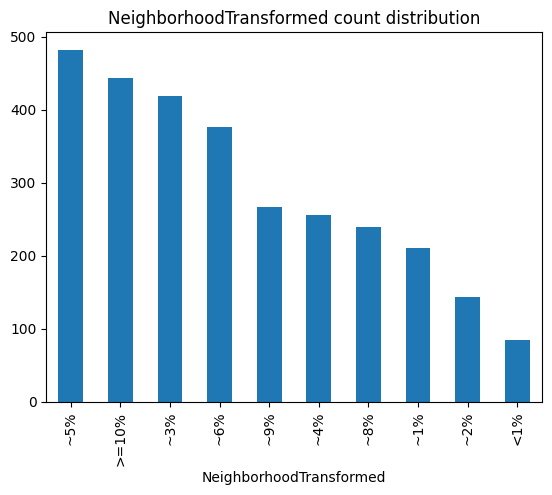

In [1824]:
# Take a look at "NeighborhoodTransformed"
df__houses["NeighborhoodTransformed"].value_counts().plot(kind="bar", title="NeighborhoodTransformed count distribution")

##### 5.1.9. "Condition1", "Condition2" : proximity to various conditions

<Axes: title={'center': 'Condition1 count distribution'}, xlabel='Condition1'>

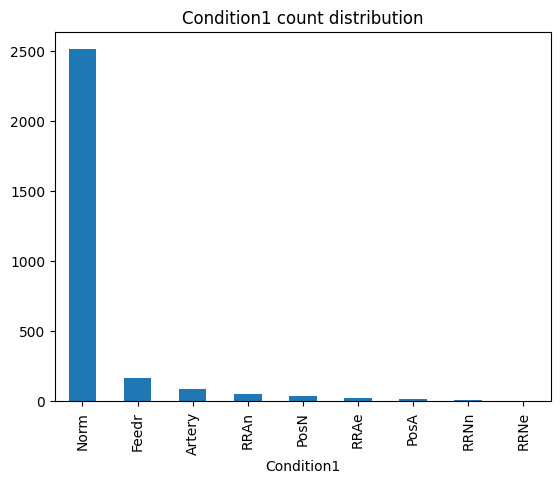

In [1825]:
# Take a look at "Condition1"
df__houses["Condition1"].value_counts().plot(kind="bar", title="Condition1 count distribution")

In [1826]:
# Take a look at "Condition1"
100*df__houses["Condition1"].value_counts() / df__houses["Condition1"].value_counts().sum()

Condition1
Norm      86.022610
Feedr      5.618362
Artery     3.151764
RRAn       1.712915
PosN       1.336074
RRAe       0.959233
PosA       0.685166
RRNn       0.308325
RRNe       0.205550
Name: count, dtype: float64

<Axes: title={'center': 'Condition2 count distribution'}, xlabel='Condition2'>

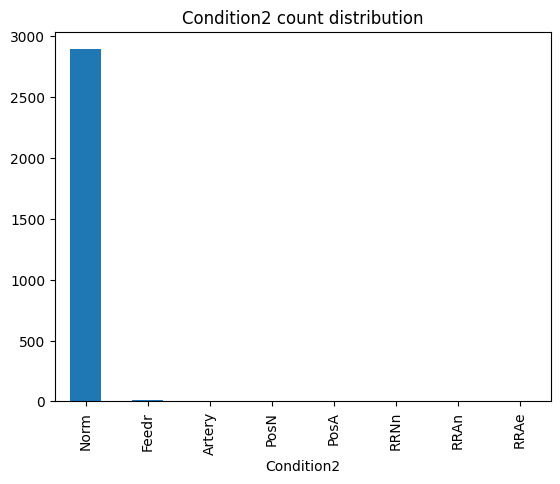

In [1827]:
# Take a look at "Condition2"
df__houses["Condition2"].value_counts().plot(kind="bar", title="Condition2 count distribution")

In [1828]:
# Take a look at "Condition2"
100*df__houses["Condition2"].value_counts() / df__houses["Condition2"].value_counts().sum()

Condition2
Norm      98.972251
Feedr      0.445358
Artery     0.171292
PosN       0.137033
PosA       0.137033
RRNn       0.068517
RRAn       0.034258
RRAe       0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- The covariate "Condition2" has one modality ("Norm") represented on 98.97% of the whole set; for its other modalities, any of them has less than 1% of the whole set. We decide to discard this covariate.
- On the contrary, "Condition1" presents one dominant modality ("Norm": 86.02% of the whole set) followed by the second most dominant modality ("Feedr" : 5.61% of the whole set), and each of its other modalities represents at least 0.21% and at most 3.15%. We will regroup all its modalities representing each less than 1% of the whole set ("RRAe", "PosA", "RRNn", "RRNe") into one modality called "Other".
</div>

In [1829]:
# Transform "Condition1"  into a new variable "Condition" where modalities "RRAe", "PosA", "RRNn", "RRNe" are regrouped as "Other"
df__houses["Condition"] = df__houses["Condition1"].apply(lambda x: "Other" if x in ["RRAe", "PosA", "RRNn", "RRNe"] else x)

# Cleanup
del df__houses["Condition2"],df__houses["Condition1"]

<Axes: title={'center': 'Condition count distribution'}, xlabel='Condition'>

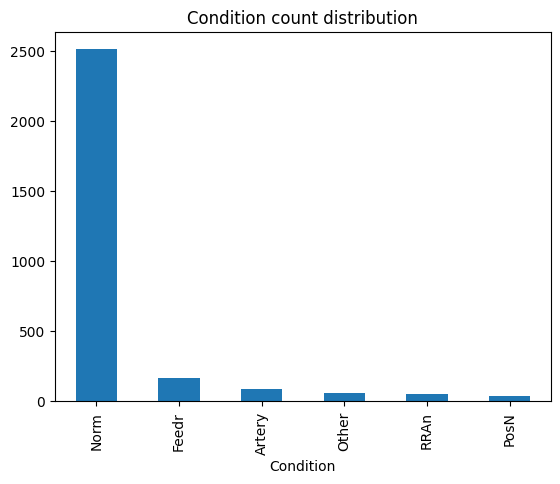

In [1830]:
# Take a look at "Condition"
df__houses["Condition"].value_counts().plot(kind="bar", title="Condition count distribution")

##### 5.1.10. "BldgType" : type of dwelling

<Axes: title={'center': 'BldgType count distribution'}, xlabel='BldgType'>

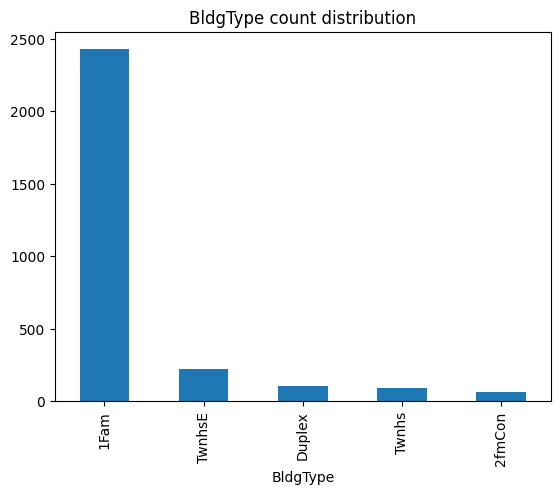

In [1831]:
# Take a look at "BldgType"
df__houses["BldgType"].value_counts().plot(kind="bar", title="BldgType count distribution")

In [1832]:
# Take a look at "BldgType"
100*df__houses["BldgType"].value_counts() / df__houses["BldgType"].value_counts().sum()

BldgType
1Fam      83.076396
TwnhsE     7.776636
Duplex     3.734156
Twnhs      3.288798
2fmCon     2.124015
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- Most of the houses (83.1%) are single-family detached; other types (Two-family Conversion, Duplex, Townhouse End Unit, Townhouse Inside Unit) represent at most 7.78% and at least 2.12% of the whole set.
- We regroup "TwnhsE" (Townhouse End Unit) and "Twnhs" (Townhouse Inside Unit) as one modality called "Twn" (Townhouse).
</div>

In [1833]:
# Regroup "TwnhsE" and "Twnhs" as one modality called "Twn"
df__houses["BldgTypeTransformed"] = df__houses["BldgType"].apply(lambda x: "Twn" if x in ["TwnhsE", "Twnhs"] else x)

# Cleanup
del df__houses["BldgType"]

<Axes: title={'center': 'BldgTypeTransformed count distribution'}, xlabel='BldgTypeTransformed'>

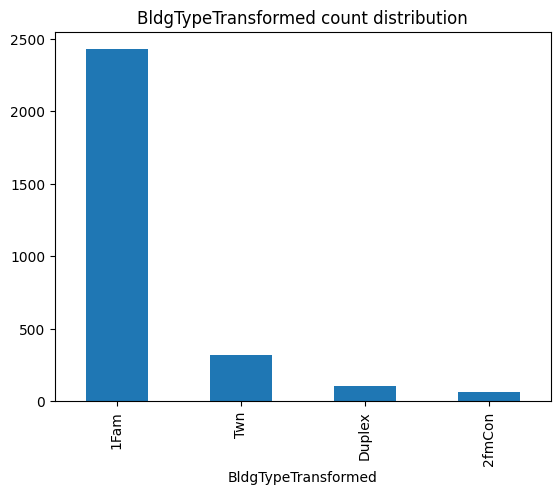

In [1834]:
# Take a look at "BldgTypeTransformed"
df__houses["BldgTypeTransformed"].value_counts().plot(kind="bar", title="BldgTypeTransformed count distribution")

##### 5.1.11. "HouseStyle" : style of dwelling

<Axes: title={'center': 'HouseStyle count distribution'}, xlabel='HouseStyle'>

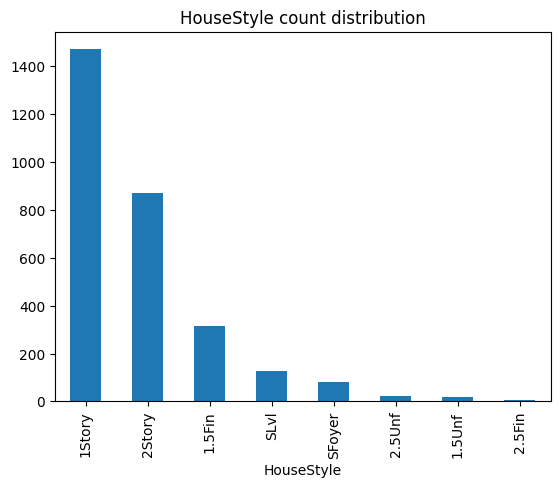

In [1835]:
# Take a look at "HouseStyle"
df__houses["HouseStyle"].value_counts().plot(kind="bar", title="HouseStyle count distribution")

In [1836]:
# Take a look at "HouseStyle"
100*df__houses["HouseStyle"].value_counts() / df__houses["HouseStyle"].value_counts().sum()

HouseStyle
1Story    50.393971
2Story    29.873244
1.5Fin    10.757109
SLvl       4.385063
SFoyer     2.843440
2.5Unf     0.822199
1.5Unf     0.650908
2.5Fin     0.274066
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

We regroup :
- "2.5Unf" (Two and one-half story: 2nd level unfinished) and "2.5Fin" (Two and one-half story: 2nd level finished) as "2.5" (Two and one-half story) ;
- "1.5Fin" (One and one-half story: 2nd level finished) and "1.5Unf" (One and one-half story: 2nd level unfinished) as "1.5" (One and one-half story) ;
- "SFoyer"	(Split Foyer) and "SLvl" (Split Level) as "S" (Split).
</div>

In [1837]:
# Regroup "HouseStyle" modalities
df__houses["HouseStyleTransformed"] = df__houses["HouseStyle"].apply(
    lambda x: "2.5" if x in ["2.5Unf", "2.5Fin"] else "1.5" if x in ["1.5Unf", "1.5Fin"] else "S" if x in ["SLvl", "SFoyer"] else x)

# Cleanup
del df__houses["HouseStyle"]

<Axes: title={'center': 'HouseStyleTransformed count distribution'}, xlabel='HouseStyleTransformed'>

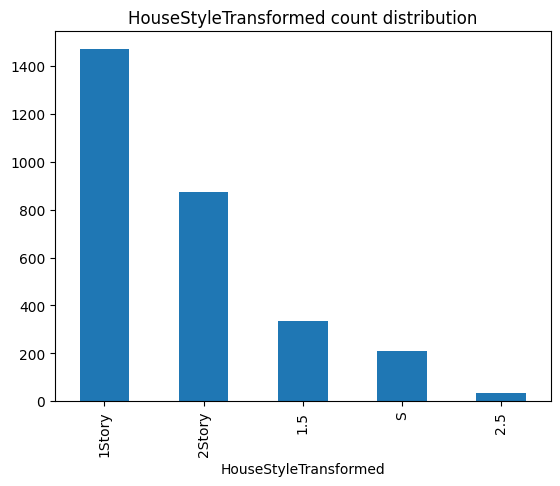

In [1838]:
# Take a look at "HouseStyleTransformed"
df__houses["HouseStyleTransformed"].value_counts().plot(kind="bar", title="HouseStyleTransformed count distribution")

##### 5.1.12. "OverallQual" : overall quality of material and finish

<Axes: title={'center': 'OverallQual count distribution'}, xlabel='OverallQual'>

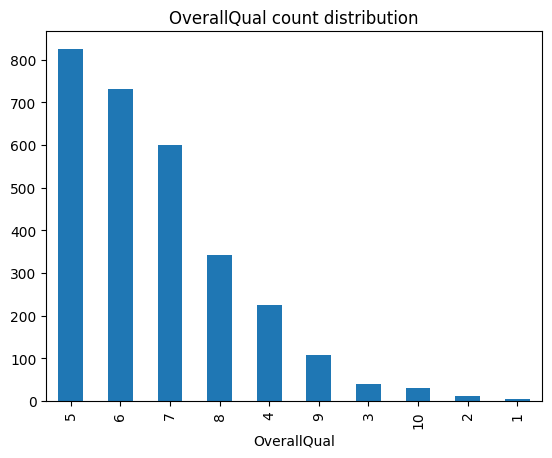

In [1839]:
# Take a look at "OverallQual"
df__houses["OverallQual"].value_counts().plot(kind="bar", title="OverallQual count distribution")

In [1840]:
# Take a look at "OverallQual"
100*df__houses["OverallQual"].value_counts() / df__houses["OverallQual"].value_counts().sum()

OverallQual
5     28.263104
6     25.042823
7     20.554985
8     11.716341
4      7.742378
9      3.665639
3      1.370332
10     1.062008
2      0.445358
1      0.137033
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- There are three dominant overall quality of material and finish ("Average": 28.26%, "Above Average": 25.04% and "Good" : 20.56%).
- In total, less than 1% of the houses overall quality of material and finish are poor or very poor.
- We set "OverallQual" data type into integer.

We will transform "OverallQual" into a new covariate called "OverallQualTransformed" : we estimate a false min 2 times less than the actual min and a false max up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.
</div>

In [1841]:
# Set as integer "OverallQual" data type
df__houses["OverallQual"] = df__houses["OverallQual"].astype(int)

In [1842]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["OverallQual"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["OverallQual"].max()

# Set an initial value to "OverallQualTransformed"
df__houses["OverallQualTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "OverallQualTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "OverallQual"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "OverallQualTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "OverallQual"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
del float__falsemin, float__falsemax, df__houses["OverallQual"]

In [1843]:
# Take a look at "OverallQualTransformed"
df__houses["OverallQualTransformed"].describe()

count    2919.000000
mean        0.286619
std         0.072305
min         0.025641
25%         0.230769
50%         0.282051
75%         0.333333
max         0.487179
Name: OverallQualTransformed, dtype: float64

##### 5.1.13. "OverallCond" : overall condition of the house

<Axes: title={'center': 'OverallCond count distribution'}, xlabel='OverallCond'>

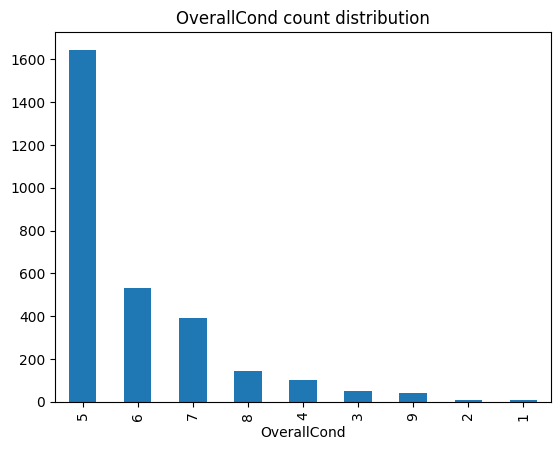

In [1844]:
# Take a look at "OverallCond"
df__houses["OverallCond"].value_counts().plot(kind="bar", title="OverallCond count distribution")

In [1845]:
# Take a look at "OverallCond"
100*df__houses["OverallCond"].value_counts() / df__houses["OverallCond"].value_counts().sum()

OverallCond
5    56.354916
6    18.191161
7    13.360740
8     4.933196
4     3.460089
3     1.712915
9     1.404591
2     0.342583
1     0.239808
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- Half of houses (56.35%) condtion are "Average" : it's the most dominant "OverallCond" modality.
- In total, less than 1% of houses overall condition are poor or very poor.
- We set "OverallCond" data type into integer.

We will transform "OverallCond" into a new covariate called "OverallCondTransformed" : we estimate a false min 2 times less than the actual min and a false max up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.
</div>

In [1846]:
# Set as integer "OverallCond" data type
df__houses["OverallCond"] = df__houses["OverallCond"].astype(int)

In [1847]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["OverallCond"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["OverallCond"].max()

# Set an initial value to "OverallCondTransformed"
df__houses["OverallCondTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "OverallCondTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "OverallCond"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "OverallCondTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "OverallCond"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
del float__falsemin, float__falsemax, df__houses["OverallCond"]

In [1848]:
# Take a look at "OverallCondTransformed"
df__houses["OverallCondTransformed"].describe()

count    2919.000000
mean        0.289404
std         0.063607
min         0.028571
25%         0.257143
50%         0.257143
75%         0.314286
max         0.485714
Name: OverallCondTransformed, dtype: float64

##### 5.1.14. "YearBuilt" : original construction date

In [1849]:
# Set "YearBuilt" data type as integer
df__houses["YearBuilt"] = df__houses["YearBuilt"].astype(int)

<Axes: title={'center': 'YearBuilt distribution'}, ylabel='Frequency'>

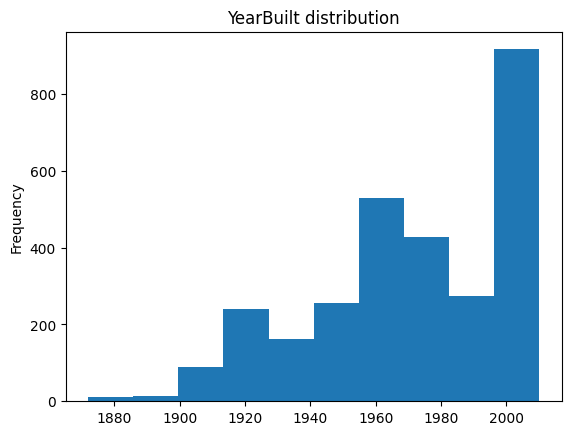

In [1850]:
# Take a look at "YearBuilt"
df__houses["YearBuilt"].plot(kind="hist", title="YearBuilt distribution")

In [1851]:
# Take a look at "YearBuilt"
df__houses["YearBuilt"].describe()

count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
25%      1953.500000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64

<div style="background-color: green; padding: 10px;">

- Houses construction year ranges from 1882 (old) to 2010 (new).
- 50% of houses construction year isn't greater than 1973.
- Only 25% of houses can be considered as newly constructed (from 2001 to 2010).

We will transform "YearBuilt" into a new covariate called "YearBuiltTransformed" : we estimate a false min 2 times less than the actual min and a false max up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.
</div>

In [1852]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["YearBuilt"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["YearBuilt"].max()

# Set an initial value to "YearBuiltTransformed"
df__houses["YearBuiltTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "YearBuiltTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "YearBuilt"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "YearBuiltTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "YearBuilt"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
del float__falsemin, float__falsemax

In [1853]:
# Take a look at "YearBuiltTransformed"
df__houses["YearBuiltTransformed"].describe()

count    2919.000000
mean        0.335705
std         0.009822
min         0.303502
25%         0.329929
50%         0.336252
75%         0.345331
max         0.348249
Name: YearBuiltTransformed, dtype: float64

##### 5.1.15. "YearRemodAdd" : remodel date

In [1854]:
# Set "YearRemodAdd" data type as integer
df__houses["YearRemodAdd"] = df__houses["YearRemodAdd"].astype(int)

<Axes: title={'center': 'YearRemodAdd distribution'}, ylabel='Frequency'>

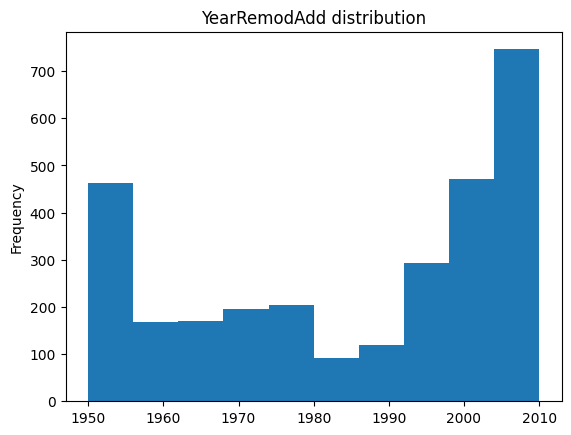

In [1855]:
# Take a look at "YearRemodAdd"
df__houses["YearRemodAdd"].plot(kind="hist", title="YearRemodAdd distribution")

In [1856]:
# Take a look at "YearRemodAdd"
df__houses["YearRemodAdd"].describe()

count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [1857]:
# Cross "YearRemodAdd" and "YearBuilt" to analyze how many houses weren't remodelled
np.trace(pd.crosstab(df__houses["YearRemodAdd"], df__houses["YearBuilt"]))

np.int64(9)

<div style="background-color: green; padding: 10px;">

- Houses remodeling year ranges from 1950 to 2010.
- Only 9 out of the 2919 houses weren't remodelled.

We will transform "YearRemodAdd" into a new covariate called "YearRemodAddTransformed" : we estimate a false min 2 times less than the actual min and a false max up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.
</div>

In [1858]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["YearRemodAdd"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["YearRemodAdd"].max()

# Set an initial value to "YearRemodAddTransformed"
df__houses["YearRemodAddTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "YearRemodAddTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "YearRemodAdd"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "YearRemodAddTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "YearRemodAdd"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
df__houses.drop(columns=["YearRemodAdd", "YearBuilt"], inplace=True)
del float__falsemin, float__falsemax

In [1859]:
# Take a look at "YearRemodAddTransformed"
df__houses["YearRemodAddTransformed"].describe()

count    2919.000000
mean        0.331450
std         0.006862
min         0.320197
25%         0.325123
50%         0.334319
75%         0.337931
max         0.339901
Name: YearRemodAddTransformed, dtype: float64

##### 5.1.16. "RoofStyle" (roof style), "RoofMatl" (roof material)

<Axes: title={'center': 'RoofStyle count distribution'}, xlabel='RoofStyle'>

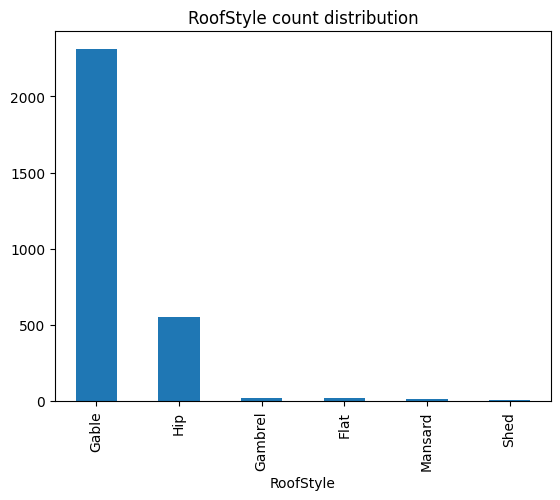

In [1860]:
# Take a look at "RoofStyle"
df__houses["RoofStyle"].value_counts().plot(kind="bar", title="RoofStyle count distribution")

In [1861]:
# Take a look at "RoofStyle"
100*df__houses["RoofStyle"].value_counts() / df__houses["RoofStyle"].value_counts().sum()

RoofStyle
Gable      79.136691
Hip        18.876328
Gambrel     0.753683
Flat        0.685166
Mansard     0.376841
Shed        0.171292
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- Most of the most (79.14%) of houses roof style is "Gable", followed in secodn place by "Hip" (18.88%).
- Other "RoofStyle" modalities have each less than 1% of the whole set : they will be regrouped into one modality called "Other".
</div>

<Axes: title={'center': 'RoofStyleTransformed count distribution'}, xlabel='RoofStyleTransformed'>

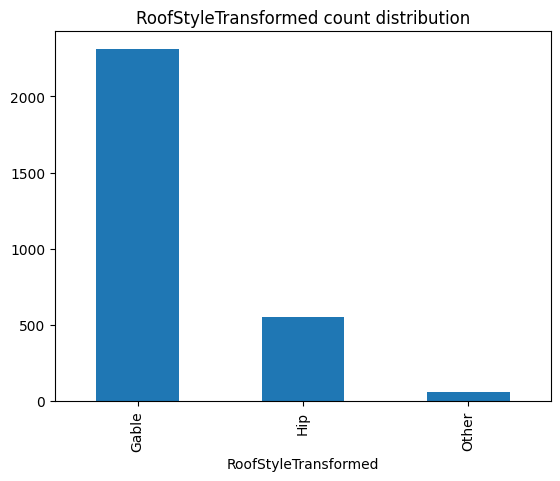

In [1862]:
# Regroup "RoofStyle" modalities having less than 1% of the whole set as one modality called "Other"
df__houses["RoofStyleTransformed"] = df__houses["RoofStyle"].apply(lambda x: "Other" if x not in ["Gable", "Hip"] else x)

# Cleanup
df__houses["RoofStyle"]

# Take a look at "RoofStyleTransformed"
df__houses["RoofStyleTransformed"].value_counts().plot(kind="bar", title="RoofStyleTransformed count distribution")

<Axes: title={'center': 'RoofMatl count distribution'}, xlabel='RoofMatl'>

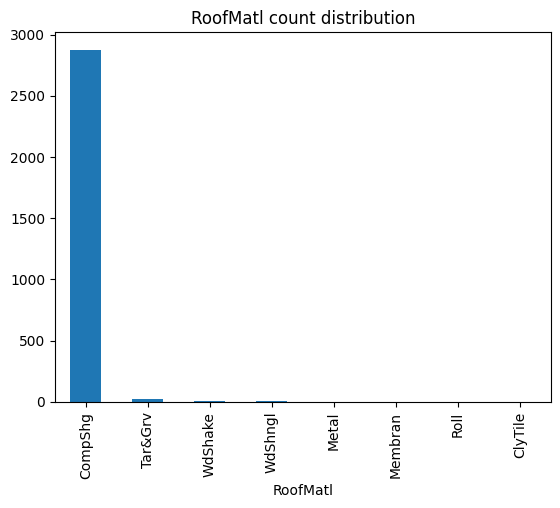

In [1863]:
# Take a look at "RoofMatl"
df__houses["RoofMatl"].value_counts().plot(kind="bar", title="RoofMatl count distribution")

In [1864]:
# Take a look at "RoofMatl"
100*df__houses["RoofMatl"].value_counts() / df__houses["RoofMatl"].value_counts().sum()

RoofMatl
CompShg    98.526893
Tar&Grv     0.787941
WdShake     0.308325
WdShngl     0.239808
Metal       0.034258
Membran     0.034258
Roll        0.034258
ClyTile     0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
98.53% of houses material are in Standard Shingle ("CompShg") and other modalities aren't well represented (less than 1% of the whole set). We will discard this covariate.
</div>

In [1865]:
# Cleanup
del df__houses["RoofMatl"]

##### 5.1.17. "ExterQual" (exterior material quality),  "ExterCond" (current condition of the exterior material)

<Axes: title={'center': 'ExterQual count distribution'}, xlabel='ExterQual'>

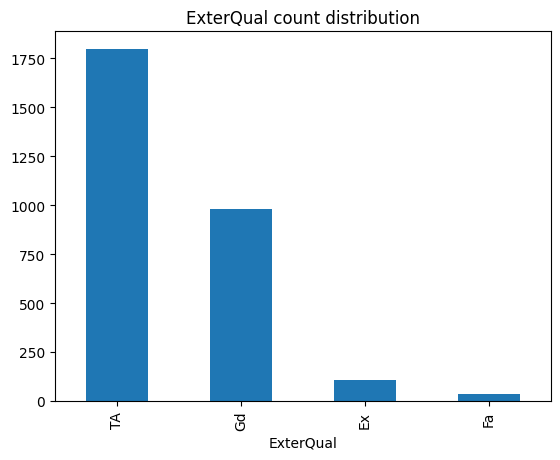

In [1866]:
# Take a look at "ExterQual"
df__houses["ExterQual"].value_counts().plot(kind="bar", title="ExterQual count distribution")

In [1867]:
# Take a look at "ExterQual"
100*df__houses["ExterQual"].value_counts() / df__houses["ExterQual"].value_counts().sum()

ExterQual
TA    61.596437
Gd    33.538883
Ex     3.665639
Fa     1.199041
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Most of houses (95.14%) have used a good or average material quality for their exterior; and no house has used a poor material quality.
</div>

<Axes: title={'center': 'ExterCond count distribution'}, xlabel='ExterCond'>

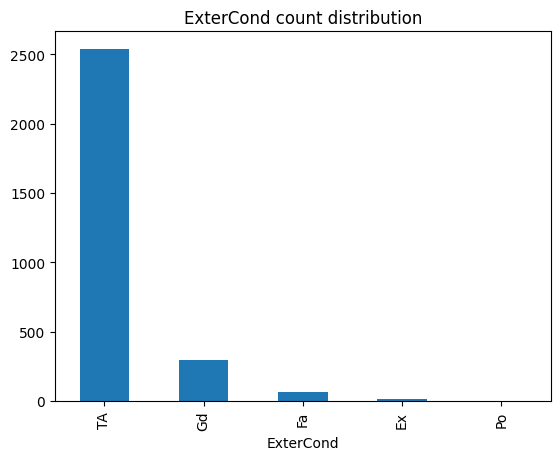

In [1868]:
# Take a look at "ExterCond"
df__houses["ExterCond"].value_counts().plot(kind="bar", title="ExterCond count distribution")

In [1869]:
# Take a look at "ExterCond"
100*df__houses["ExterCond"].value_counts() / df__houses["ExterCond"].value_counts().sum()

ExterCond
TA    86.947585
Gd    10.243234
Fa     2.295307
Ex     0.411100
Po     0.102775
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Less than 1% of houses have currently a poor condition of their exterior.
</div>

##### 5.1.18. "Foundation" : type of foundation

<Axes: title={'center': 'Foundation count distribution'}, xlabel='Foundation'>

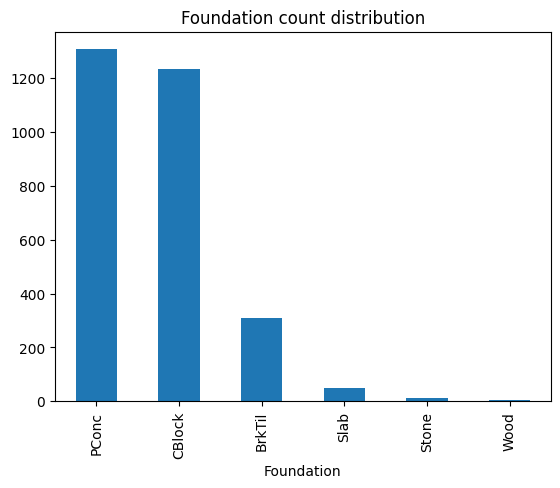

In [1870]:
# Take a look at "Foundation"
df__houses["Foundation"].value_counts().plot(kind="bar", title="Foundation count distribution")

In [1871]:
# Take a look at "Foundation"
100*df__houses["Foundation"].value_counts() / df__houses["Foundation"].value_counts().sum()

Foundation
PConc     44.809866
CBlock    42.309010
BrkTil    10.654334
Slab       1.678657
Stone      0.376841
Wood       0.171292
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Modalities which are well represented are "PConc", "CBlock" and "BrkTil". Others will regrouped as one modality called "Other".
</div>

In [1872]:
# Regroup "Slab", "Stone" and "Wood" as one modality called "Other"
df__houses["FoundationTransformed"] = df__houses["Foundation"].apply(lambda x: "Other" if x in ["Slab", "Stone", "Wood"] else x)

# Cleanup
del df__houses["Foundation"]

<Axes: title={'center': 'FoundationTransformed count distribution'}, xlabel='FoundationTransformed'>

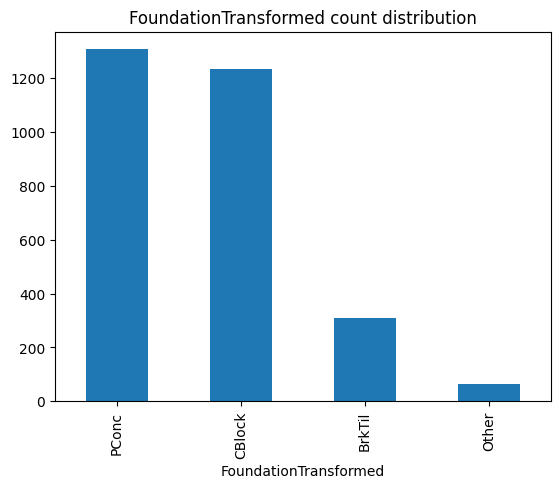

In [1873]:
# Take a look at "FoundationTransformed"
df__houses["FoundationTransformed"].value_counts().plot(kind="bar", title="FoundationTransformed count distribution")

##### 5.1.19. "Heating" (type of heating), "HeatingQC" (heating quality and current condition)

<Axes: title={'center': 'Heating count distribution'}, xlabel='Heating'>

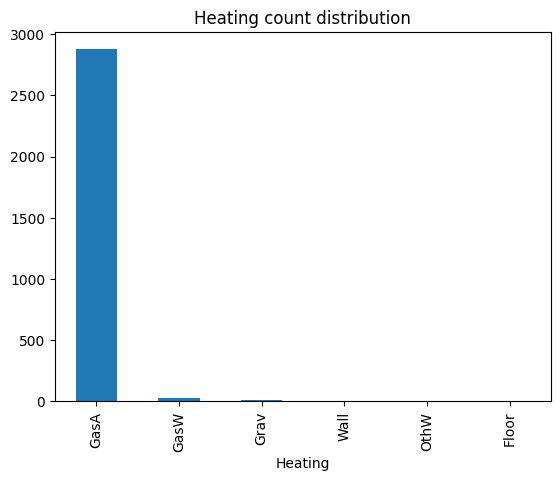

In [1874]:
# Take a look at "Heating"
df__houses["Heating"].value_counts().plot(kind="bar", title="Heating count distribution")

In [1875]:
# Take a look at "Heating"
100*df__houses["Heating"].value_counts() / df__houses["Heating"].value_counts().sum()

Heating
GasA     98.458376
GasW      0.924974
Grav      0.308325
Wall      0.205550
OthW      0.068517
Floor     0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
98.46% of houses have a Gas forced warm air furnace as heating system. Other types of heating systems aren't well represented (less than 1% of the whole set for each). We will discard this covariate.
</div>

In [1876]:
# Cleanup
del df__houses["Heating"]

<Axes: title={'center': 'HeatingQC count distribution'}, xlabel='HeatingQC'>

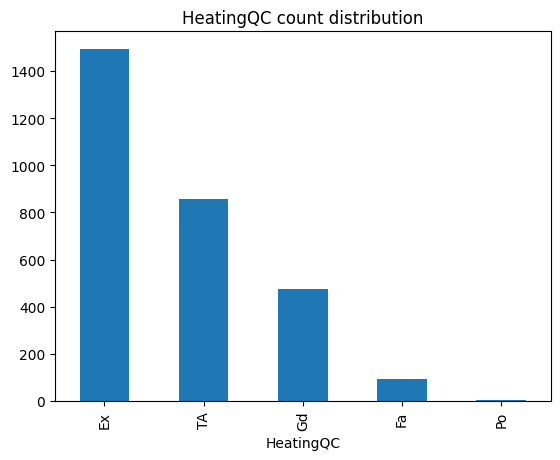

In [1877]:
# Take a look at "HeatingQC"
df__houses["HeatingQC"].value_counts().plot(kind="bar", title="HeatingQC count distribution")

In [1878]:
# Take a look at "HeatingQC"
100*df__houses["HeatingQC"].value_counts() / df__houses["HeatingQC"].value_counts().sum()

HeatingQC
Ex    51.147653
TA    29.359370
Gd    16.238438
Fa     3.151764
Po     0.102775
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- At least 99% of houses have a good heating quality, which is still at least in a fair condition of usage. 
- Only 0.1% of houses have a heating system in a bad condition of usage.
</div>

##### 5.1.20. "CentralAir" : central air conditioning

<Axes: title={'center': 'CentralAir count distribution'}, xlabel='CentralAir'>

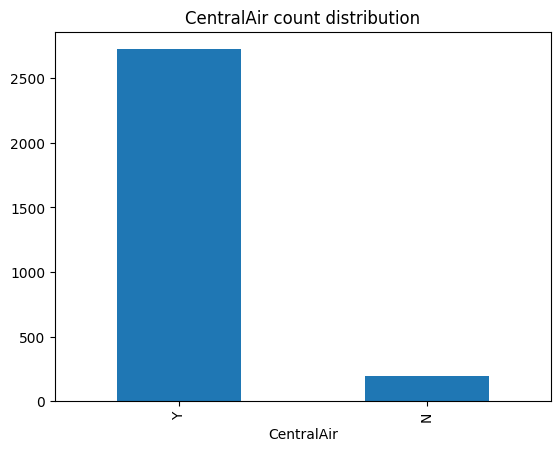

In [1879]:
# Take a look at "CentralAir"
df__houses["CentralAir"].value_counts().plot(kind="bar", title="CentralAir count distribution")

In [1880]:
# Take a look at "CentralAir"
100*df__houses["CentralAir"].value_counts() / df__houses["CentralAir"].value_counts().sum()

CentralAir
Y    93.285372
N     6.714628
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

93.29% of houses have a central air conditioning; while only 6.71% have no central air conditioning : we decide that only one of both modalities of "CentralAir" is well represented so we remove this feature from the analysis.
</div>

In [1881]:
# Clean up
del df__houses["CentralAir"]

##### 5.1.21. "1stFlrSF", "2ndFlrSF" : first and second floor square feet

In [1882]:
# Convert "1stFlrSF", "2ndFlrSF" data type into float
df__houses[["1stFlrSF", "2ndFlrSF"]] = df__houses[["1stFlrSF", "2ndFlrSF"]].map(float)

In [1883]:
# Combine both floors square feet into one modality called "AllFlrSF"
df__houses["AllFlrSF"] = df__houses[["1stFlrSF", "2ndFlrSF"]].sum(axis=1)

# Clean up
df__houses.drop(columns=["1stFlrSF", "2ndFlrSF"], inplace=True)

<Axes: title={'center': 'AllFlrSF distribution'}, ylabel='Frequency'>

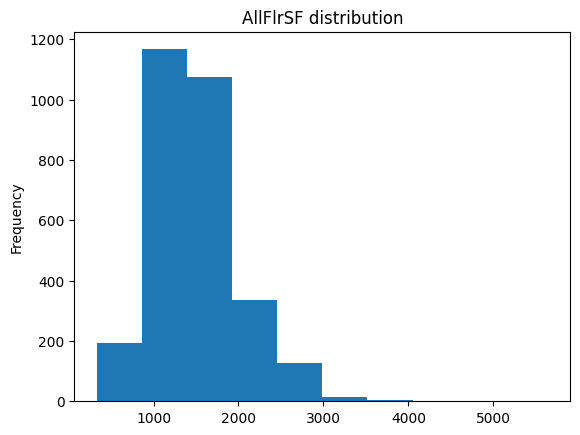

In [1884]:
# Take a look at "AllFlrSF"
df__houses["AllFlrSF"].plot(kind="hist", title="AllFlrSF distribution")

In [1885]:
# Take a look at "AllFlrSF"
df__houses["AllFlrSF"].describe()

count    2919.000000
mean     1496.065433
std       503.675790
min       334.000000
25%      1120.000000
50%      1440.000000
75%      1742.500000
max      5642.000000
Name: AllFlrSF, dtype: float64

<div style="background-color: green; padding: 10px;">

We will transform "AllFlrSF" into a new covariate called "AllFlrSFTransformed" : we estimate a false min 2 times less than the actual min and a false max up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.
</div>

In [1886]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["AllFlrSF"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["AllFlrSF"].max()

# Set an initial value to "AllFlrSFTransformed"
df__houses["AllFlrSFTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "AllFlrSFTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "AllFlrSF"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "AllFlrSFTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "AllFlrSF"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
del float__falsemin, float__falsemax, df__houses["AllFlrSF"]

In [1887]:
# Take a look at "AllFlrSFTransformed"
df__houses["AllFlrSFTransformed"].describe()

count    2919.000000
mean        0.119553
std         0.045307
min         0.015022
25%         0.085725
50%         0.114509
75%         0.141720
max         0.492489
Name: AllFlrSFTransformed, dtype: float64

##### 5.1.22. "LowQualFinSF" : low quality finished square feet

In [1888]:
# Convert "LowQualFinSF" data type into float
df__houses["LowQualFinSF"] = df__houses["LowQualFinSF"].astype(float)

<Axes: title={'center': 'LowQualFinSF distribution'}, ylabel='Frequency'>

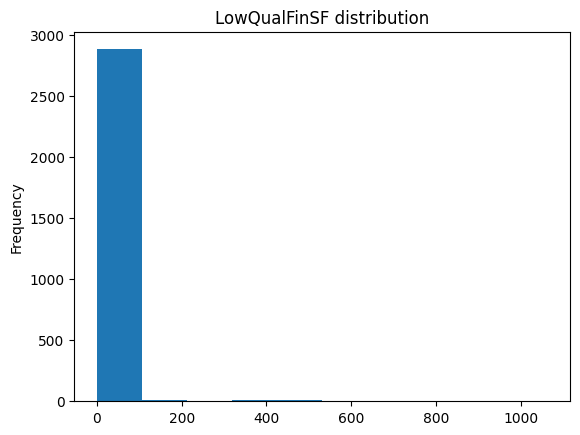

In [1889]:
# Take a look at "LowQualFinSF"
df__houses["LowQualFinSF"].plot(kind="hist", title="LowQualFinSF distribution")

In [1890]:
# Take a look at "LowQualFinSF"
df__houses["LowQualFinSF"].describe()

count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64

In [1891]:
# Analyze quantiles values after the third quartile
list__quantileorders = list(np.linspace(0.75, 1, num=20))
df__houses["LowQualFinSF"].quantile(list__quantileorders)

0.750000       0.000000
0.763158       0.000000
0.776316       0.000000
0.789474       0.000000
0.802632       0.000000
0.815789       0.000000
0.828947       0.000000
0.842105       0.000000
0.855263       0.000000
0.868421       0.000000
0.881579       0.000000
0.894737       0.000000
0.907895       0.000000
0.921053       0.000000
0.934211       0.000000
0.947368       0.000000
0.960526       0.000000
0.973684       0.000000
0.986842      69.342105
1.000000    1064.000000
Name: LowQualFinSF, dtype: float64

<div style="background-color: green; padding: 10px;">

97.37% of houses have 0 as low quality finished square feet ; we decide to remove this feature.
</div>

In [1892]:
# Cleanup
del list__quantileorders, df__houses["LowQualFinSF"]

##### 5.1.23. "GrLivArea" : ground living area square feet

In [1893]:
# Convert "GrLivArea" data type into float
df__houses["GrLivArea"] = df__houses["GrLivArea"].astype(float)

<Axes: title={'center': 'GrLivArea distribution'}, ylabel='Frequency'>

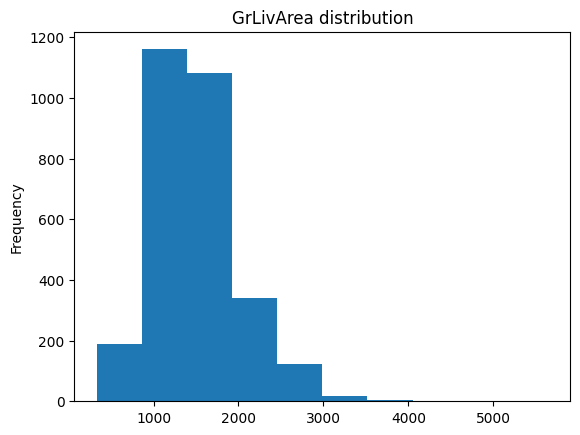

In [1894]:
# Take a look at "GrLivArea"
df__houses["GrLivArea"].plot(kind="hist", title="GrLivArea distribution")

In [1895]:
# Take a look at "GrLivArea"
df__houses["GrLivArea"].describe()

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64

<div style="background-color: green; padding: 10px;">
We will transform "GrLivArea" into a new covariate called "GrLivAreaTransformed" : we estimate a false min 2 times less than the actual min and a false max up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.
</div>

In [1896]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["GrLivArea"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["GrLivArea"].max()

# Set an initial value to "GrLivAreaTransformed"
df__houses["GrLivAreaTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "GrLivAreaTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "GrLivArea"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "GrLivAreaTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "GrLivArea"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
del float__falsemin, float__falsemax, df__houses["GrLivArea"]

In [1897]:
# Take a look at "GrLivAreaTransformed"
df__houses["GrLivAreaTransformed"].describe()

count    2919.000000
mean        0.119975
std         0.045520
min         0.015022
25%         0.086264
50%         0.114869
75%         0.141810
max         0.492489
Name: GrLivAreaTransformed, dtype: float64

In [1898]:
# Verify that "GrLivAreaTransformed" and "AllFlrSFTransformed" aren't identical for most of all houses
100*sum(df__houses["AllFlrSFTransformed"] == df__houses["GrLivAreaTransformed"])/df__houses.shape[0]

98.6296676944159

In [1899]:
# Verify that "GrLivAreaTransformed" is bigger than "AllFlrSFTransformed" for houses which haven't their values identical
100*sum(df__houses["AllFlrSFTransformed"] < df__houses["GrLivAreaTransformed"])/df__houses.shape[0]

1.3703323055841041

<div style="background-color: green; padding: 10px;">

- 98.63% of houses ground living area is equal to the total of both floors squared area. 
- 1.37% of houses have their values not identical so "GrLivAreaTransformed" covers more ground than "AllFlrSFTransformed".

We discard "AllFlrSFTransformed" and keep "GrLivAreaTransformed".
</div>

In [1900]:
# Cleanup
del df__houses["AllFlrSFTransformed"]

##### 5.1.24. "FullBath", "HalfBath" : full and half bathrooms above grade

In [1901]:
# Convert "FullBath" and "HalfBath" data type into integer
df__houses[["FullBath", "HalfBath"]] = df__houses[["FullBath", "HalfBath"]].astype(int)

In [1902]:
# Combine "FullBath" and "HalfBath" into a new covariate called "AllBath"
df__houses["AllBath"] = df__houses[["FullBath", "HalfBath"]].sum(axis=1)

# Cleanup
df__houses.drop(columns=["FullBath", "HalfBath"], inplace=True)

In [1903]:
# Count the number of unique values given by "AllBath"
df__houses["AllBath"].nunique()

7

<Axes: title={'center': 'AllBath count distribution'}, xlabel='AllBath'>

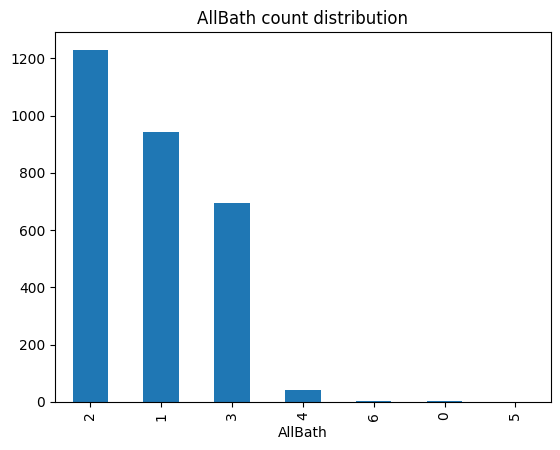

In [1904]:
# Take a look at "AllBath"
df__houses["AllBath"].value_counts().plot(kind="bar", title="AllBath count distribution")

In [1905]:
# Take a look at "AllBath"
100*df__houses["AllBath"].value_counts() / df__houses["AllBath"].value_counts().sum()

AllBath
2    42.137718
1    32.339842
3    23.775266
4     1.473107
6     0.137033
0     0.102775
5     0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

We transform "AllBath" covariate into a categorical one following this process :

- The first modality ("<=1") will be houses with bathrooms total less or equal to 1 ;
- The second modality ("~2") will be houses with bathrooms total equal to 2 ;
- The third modality (">=3") will be houses with bathrooms total equal or higher than 3.
</div>

In [1906]:
# Transform "AllBath" into "AllBathTransformed"
df__houses["AllBathTransformed"] = df__houses["AllBath"].apply(lambda x: "<=1" if x <= 1 else ">=3" if x >= 3 else "~2")

# Cleanup
del df__houses["AllBath"]

<Axes: title={'center': 'AllBathTransformed count distribution'}, xlabel='AllBathTransformed'>

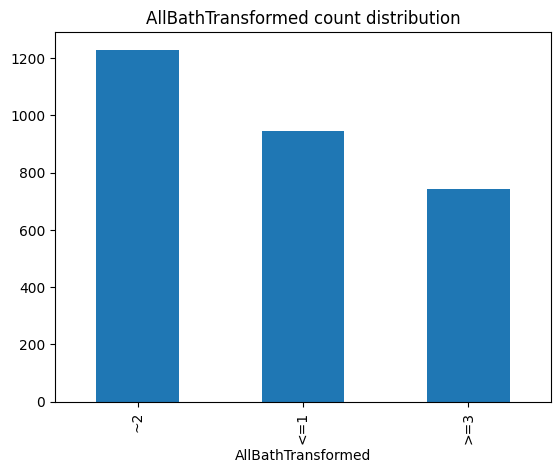

In [1907]:
# Take a look at "AllBathTransformed"
df__houses["AllBathTransformed"].value_counts().plot(kind="bar", title="AllBathTransformed count distribution")

##### 5.1.25. "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd" : bedrooms, kitchen, rooms above ground

In [1908]:
# Convert "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd" data type into integer
df__houses[["BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd"]] = df__houses[["BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd"]].astype(int)

# Combine "BedroomAbvGr", "KitchenAbvGr" and "TotRmsAbvGrd" into a new covariate called "AllRms"
df__houses["AllRms"] = df__houses[["BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd"]].sum(axis=1)

# Cleanup
df__houses.drop(columns=["BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd"], inplace=True)

In [1909]:
# Count the number of unique values given by "AllRms"
df__houses["AllRms"].nunique()

18

<Axes: title={'center': 'AllRms count distribution'}, xlabel='AllRms'>

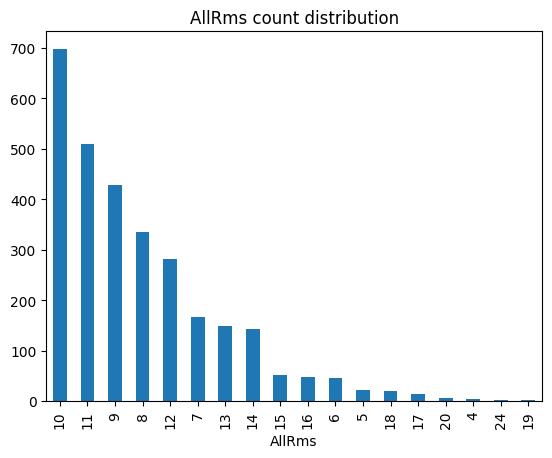

In [1910]:
# Take a look at "AllRms"
df__houses["AllRms"].value_counts().plot(kind="bar", title="AllRms count distribution")

In [1911]:
# Take a look at "AllRms"
series__table = 100*df__houses["AllRms"].value_counts() / df__houses["AllRms"].value_counts().sum()
df__table = pd.DataFrame({"Value": series__table.index, "Percentage": series__table.values}).sort_values(by=["Value"], ascending=True)
df__table

,Value,Percentage
15,4,0.102775
11,5,0.719424
10,6,1.575882
5,7,5.721137
3,8,11.510791
2,9,14.662556
0,10,23.912299
1,11,17.437479
4,12,9.660843
6,13,5.104488


<div style="background-color: green; padding: 10px;">

We transform "AllRms" covariate into a categorical one following this process :

- The first modality ("<=8") will be houses with all rooms total less or equal to 8 ;
- The second modality ("~9") will be houses with all rooms total equal to 9 ;
- The third modality ("~10") will be houses with all rooms total equal to 10 ;
- The fourth modality ("~11") will be houses with all rooms total equal to 11 ;
- The fifth modality (">=12") will be houses with all rooms total equal or higher than 12.
</div>

In [1912]:
# Transform "AllRms" into "AllRmsTransformed"
df__houses["AllRmsTransformed"] = df__houses["AllRms"].apply(
    lambda x: "<=8" if x <= 8 else "~9" if x == 9 else "~10" if x == 10 else "~11" if x == 11 else ">=12")

# Cleanup
del series__table, df__table, df__houses["AllRms"]

<Axes: title={'center': 'AllRmsTransformed count distribution'}, xlabel='AllRmsTransformed'>

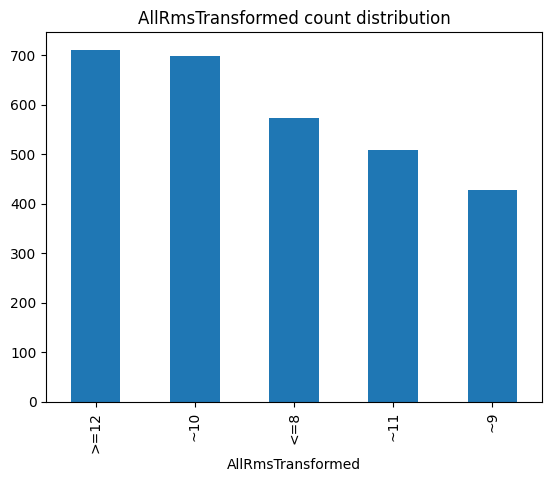

In [1913]:
# Take a look at "AllRmsTransformed"
df__houses["AllRmsTransformed"].value_counts().plot(kind="bar", title="AllRmsTransformed count distribution")

##### 5.1.26. "Fireplaces" : number of fireplaces

In [1914]:
# Convert "Fireplaces" data type into integer
df__houses[["Fireplaces"]] = df__houses[["Fireplaces"]].astype(int)

In [1915]:
# Count the number of unique values given by "Fireplaces"
df__houses["Fireplaces"].nunique()

5

<Axes: title={'center': 'Fireplaces count distribution'}, xlabel='Fireplaces'>

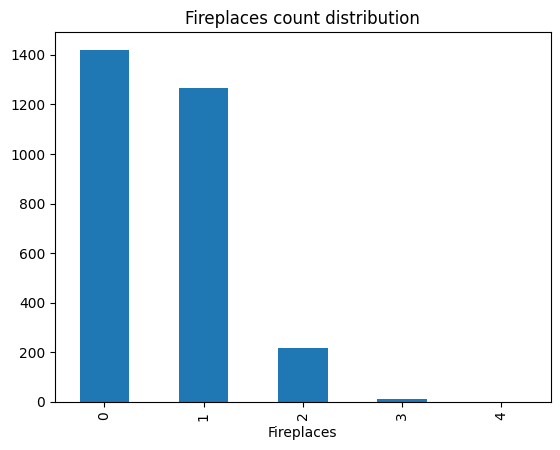

In [1916]:
# Take a look at "Fireplaces"
df__houses["Fireplaces"].value_counts().plot(kind="bar", title="Fireplaces count distribution")

In [1917]:
# Take a look at "Fireplaces"
100*df__houses["Fireplaces"].value_counts() / df__houses["Fireplaces"].value_counts().sum()

Fireplaces
0    48.646797
1    43.439534
2     7.502569
3     0.376841
4     0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

We transform "Fireplaces" covariate into a categorical one following this process :

- The first modality ("No") will be houses with no fireplace ;
- The second modality ("Yes") will be houses with at least one fireplace.
</div>

<Axes: title={'center': 'FireplacesTransformed count distribution'}, xlabel='FireplacesTransformed'>

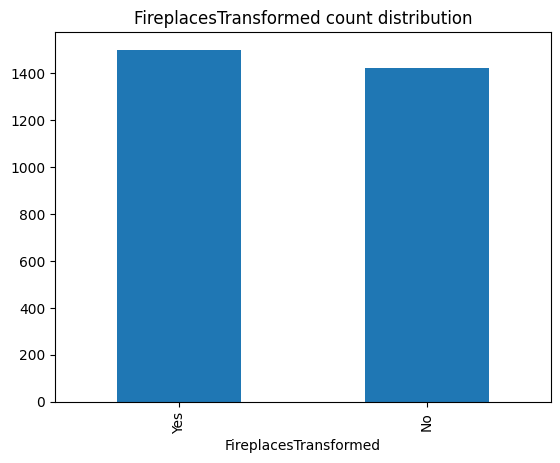

In [1918]:
# Transform "Fireplaces" into "FireplacesTransformed"
df__houses["FireplacesTransformed"] = df__houses["Fireplaces"].apply(lambda x: "No" if x == 0 else "Yes")

# Cleanup
del df__houses["Fireplaces"]

# Take a look at "FireplacesTransformed"
df__houses["FireplacesTransformed"].value_counts().plot(kind="bar", title="FireplacesTransformed count distribution")

##### 5.1.27. "PavedDrive" : paved driveway

<Axes: title={'center': 'PavedDrive count distribution'}, xlabel='PavedDrive'>

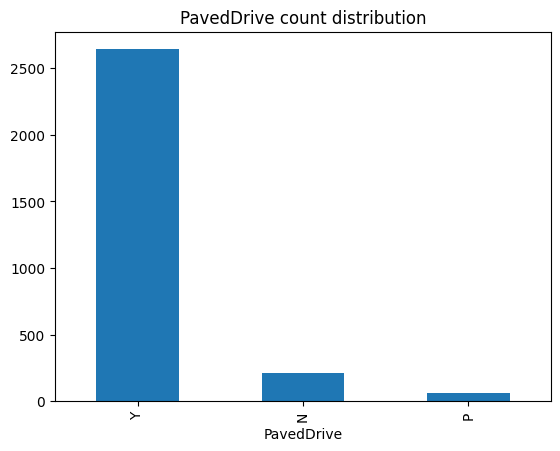

In [1919]:
# Take a look at "PavedDrive"
df__houses["PavedDrive"].value_counts().plot(kind="bar", title="PavedDrive count distribution")

In [1920]:
# Take a look at "PavedDrive"
100*df__houses["PavedDrive"].value_counts() / df__houses["PavedDrive"].value_counts().sum()

PavedDrive
Y    90.476190
N     7.399794
P     2.124015
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- Most of houses (90.48%) have their driveway totally paved; 2.12% have a partial paved driveway and only 7.4% have a driveway not paved.
- We decide to transform "PavedDrive" into a new covariate called "PavedDriveTransformed" having two modalities : "yes" which represents the fact that there's pavement on the driveway (total or partial), and "No" for that fact that there's no pavement on the driveway.
</div>

<Axes: title={'center': 'PavedDriveTransformed count distribution'}, xlabel='PavedDriveTransformed'>

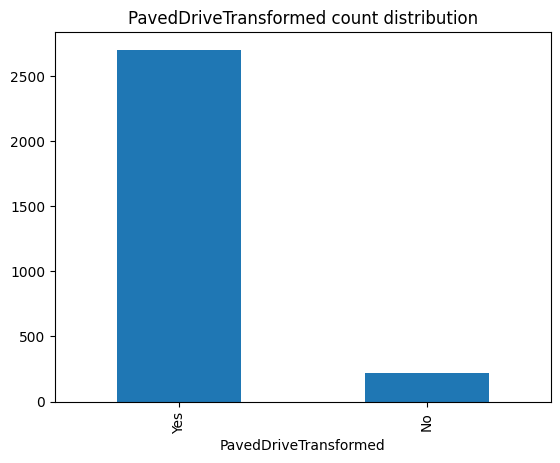

In [1921]:
# Transform "PavedDrive" into "PavedDriveTransformed"
df__houses["PavedDriveTransformed"] = df__houses["PavedDrive"].apply(lambda x: "No" if x == "N" else "Yes")

# Cleanup
del df__houses["PavedDrive"]

# Take a look at "PavedDriveTransformed"
df__houses["PavedDriveTransformed"].value_counts().plot(kind="bar", title="PavedDriveTransformed count distribution")

##### 5.1.28. "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea" : house outside area

In [1922]:
# Convert "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea" data type into float
df__houses[["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"]] = df__houses[["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"]].astype(float)

# Combine all these covariates into a new called "OutsideArea"
df__houses["OutsideArea"] = df__houses[["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"]].sum(axis=1)

# Cleanup
df__houses.drop(columns=["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"], inplace=True)

<Axes: title={'center': 'OutsideArea distribution'}, ylabel='Frequency'>

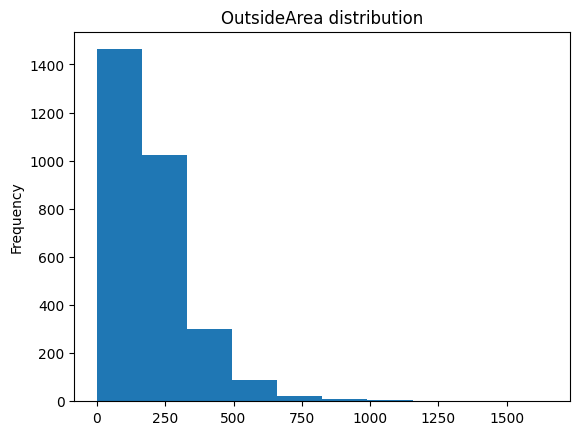

In [1923]:
# Take a look at "OutsideArea"
df__houses["OutsideArea"].plot(kind="hist", title="OutsideArea distribution")

In [1924]:
# Take a look at "OutsideArea"
df__houses["OutsideArea"].describe()

count    2919.000000
mean      185.211374
std       168.986616
min         0.000000
25%        48.000000
50%       164.000000
75%       267.500000
max      1651.000000
Name: OutsideArea, dtype: float64

<div style="background-color: green; padding: 10px;">
We will transform "OutsideArea" into a new covariate called "OutsideAreaTransformed" : we estimate a false min 2 times less than the actual min and a false max up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.
</div>

In [1925]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["OutsideArea"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["OutsideArea"].max()

# Set an initial value to "OutsideAreaTransformed"
df__houses["OutsideAreaTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "OutsideAreaTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "OutsideArea"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "OutsideAreaTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "OutsideArea"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
del float__falsemin, float__falsemax, df__houses["OutsideArea"]

In [1926]:
# Take a look at "OutsideAreaTransformed"
df__houses["OutsideAreaTransformed"].describe()

count    2919.000000
mean        0.059363
std         0.054162
min         0.000000
25%         0.015385
50%         0.052564
75%         0.085737
max         0.529167
Name: OutsideAreaTransformed, dtype: float64

##### 5.1.29. "MiscVal" : $Value of miscellaneous feature

In [1927]:
# Convert "MiscVal" data type into float
df__houses["MiscVal"] = df__houses["MiscVal"].astype(float)

<Axes: title={'center': 'MiscVal distribution'}, ylabel='Frequency'>

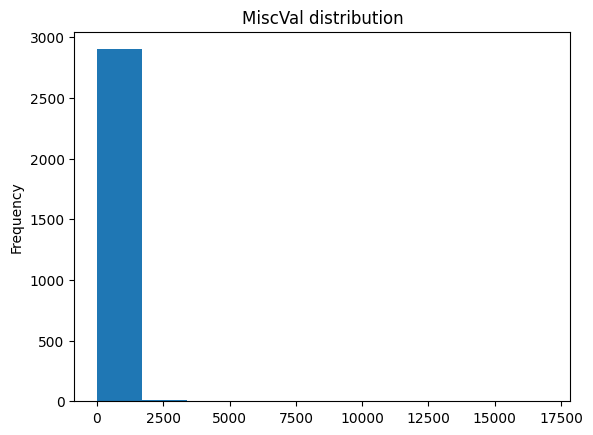

In [1928]:
# Take a look at "MiscVal"
df__houses["MiscVal"].plot(kind="hist", title="MiscVal distribution")

In [1929]:
# Take a look at "MiscVal"
df__houses["MiscVal"].describe()

count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

In [1930]:
# Analyze quantiles values after the third quartile
list__quantileorders = list(np.linspace(0.75, 1, num=20))
df__houses["MiscVal"].quantile(list__quantileorders)

0.750000        0.0
0.763158        0.0
0.776316        0.0
0.789474        0.0
0.802632        0.0
0.815789        0.0
0.828947        0.0
0.842105        0.0
0.855263        0.0
0.868421        0.0
0.881579        0.0
0.894737        0.0
0.907895        0.0
0.921053        0.0
0.934211        0.0
0.947368        0.0
0.960526        0.0
0.973684      450.0
0.986842      700.0
1.000000    17000.0
Name: MiscVal, dtype: float64

<div style="background-color: green; padding: 10px;">
96.05% of houses have no miscellaneous feature, and we decide to discard this feature from any further analysis.
</div>

In [1931]:
# Cleanup
del list__quantileorders, df__houses["MiscVal"]

##### 5.1.30. "MoSold", "YrSold" : month and year of sold

In [1932]:
# Convert "MoSold" and "YrSold" data type into integer
df__houses[["MoSold", "YrSold"]] = df__houses[["MoSold", "YrSold"]].astype(int)

In [1933]:
# Count the number of unique values given by "MoSold"
df__houses["MoSold"].nunique()

12

<Axes: title={'center': 'MoSold count distribution'}, xlabel='MoSold'>

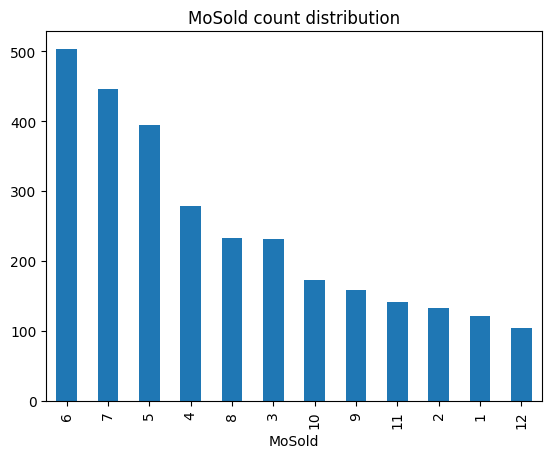

In [1934]:
# Take a look at "MoSold"
df__houses["MoSold"].value_counts().plot(kind="bar", title="MoSold count distribution")

In [1935]:
# Take a look at "MoSold"
100*df__houses["MoSold"].value_counts() / df__houses["MoSold"].value_counts().sum()

MoSold
6     17.231929
7     15.279205
5     13.497773
4      9.558068
8      7.982186
3      7.947927
10     5.926687
9      5.412813
11     4.864680
2      4.556355
1      4.179514
12     3.562864
Name: count, dtype: float64

In [1936]:
# Count the number of unique values given by "YrSold"
df__houses["YrSold"].nunique()

5

<Axes: title={'center': 'YrSold count distribution'}, xlabel='YrSold'>

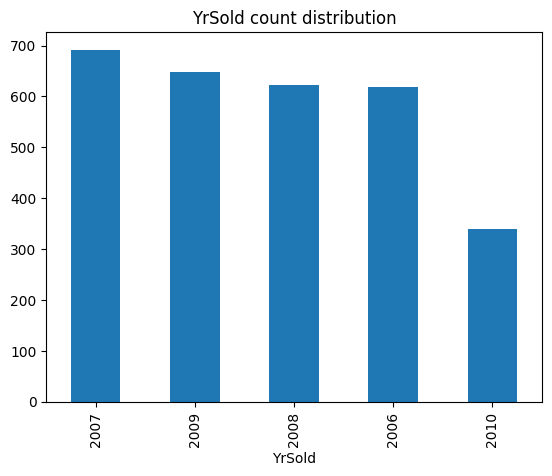

In [1937]:
# Take a look at "YrSold"
df__houses["YrSold"].value_counts().plot(kind="bar", title="YrSold count distribution")

In [1938]:
# Take a look at "YrSold"
100*df__houses["YrSold"].value_counts() / df__houses["YrSold"].value_counts().sum()

YrSold
2007    23.706749
2009    22.165125
2008    21.308667
2006    21.205892
2010    11.613566
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- The month in which generally most of houses are sold are May, June and July. December is the month having the least sales. 

We will transform "MoSold" into a new covariate called "MoSoldTransformed" : we estimate a false min 2 times less than the actual min and a false max up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.

- The year having the most sales is 2007, whereas the one with the least sales is 2010.

We will transform "YrSold" into a new covariate called "YrSoldTransformed" : we estimate a false min 2 times less than the actual min and a false max up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.
 
</div>

In [1939]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["MoSold"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["MoSold"].max()

# Set an initial value to "MoSoldTransformed"
df__houses["MoSoldTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "MoSoldTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "MoSold"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "MoSoldTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "MoSold"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
del float__falsemin, float__falsemax, df__houses["MoSold"]

In [1940]:
# Take a look at "MoSoldTransformed"
df__houses["MoSoldTransformed"].describe()

count    2919.000000
mean        0.243110
std         0.115522
min         0.021277
25%         0.148936
50%         0.234043
75%         0.319149
max         0.489362
Name: MoSoldTransformed, dtype: float64

In [1941]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["YrSold"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["YrSold"].max()

# Set an initial value to "YrSoldTransformed"
df__houses["YrSoldTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "YrSoldTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "YrSold"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "YrSoldTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "YrSold"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
del float__falsemin, float__falsemax, df__houses["YrSold"]

In [1942]:
# Take a look at "YrSoldTransformed"
df__houses["YrSoldTransformed"].describe()

count    2919.000000
mean        0.333044
std         0.000436
min         0.332449
25%         0.332781
50%         0.333112
75%         0.333444
max         0.333775
Name: YrSoldTransformed, dtype: float64

##### 5.1.31. "SaleCondition" : condition of sale

<Axes: title={'center': 'SaleCondition count distribution'}, xlabel='SaleCondition'>

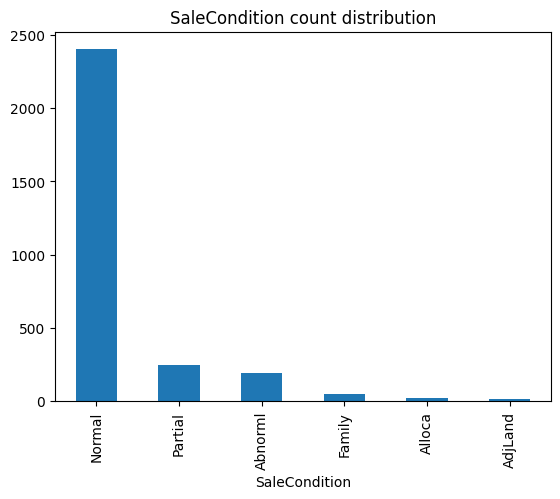

In [1943]:
# Take a look at "SaleCondition"
df__houses["SaleCondition"].value_counts().plot(kind="bar", title="SaleCondition count distribution")

In [1944]:
# Take a look at "SaleCondition"
100*df__houses["SaleCondition"].value_counts() / df__houses["SaleCondition"].value_counts().sum()

SaleCondition
Normal     82.288455
Partial     8.393285
Abnorml     6.509078
Family      1.575882
Alloca      0.822199
AdjLand     0.411100
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

Most of houses (82.29%) were sold normally. Other modalities aren't so well represented, and we decide to regroup them as one modality called "Other".
</div>

<Axes: title={'center': 'SaleConditionTransformed count distribution'}, xlabel='SaleConditionTransformed'>

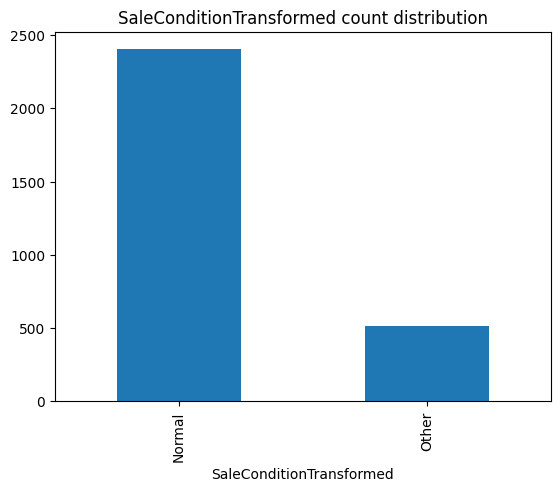

In [1945]:
# Regroup "SaleCondition" modalities different from "Normal" as one modality called "Other"
df__houses["SaleConditionTransformed"] = df__houses["SaleCondition"].apply(lambda x: "Other" if x != "Normal" else x)

# Cleanup
del df__houses["SaleCondition"]

# Take a look at "SaleConditionTransformed"
df__houses["SaleConditionTransformed"].value_counts().plot(kind="bar", title="SaleConditionTransformed count distribution")

In [1946]:
# Empty garbage collector
gc.collect()

363

##### *5.2. Covariates with missing values*

##### 5.2.1. "MSZoning" : general zoning classification of the sale

<Axes: title={'center': 'MSZoning count distribution'}, xlabel='MSZoning'>

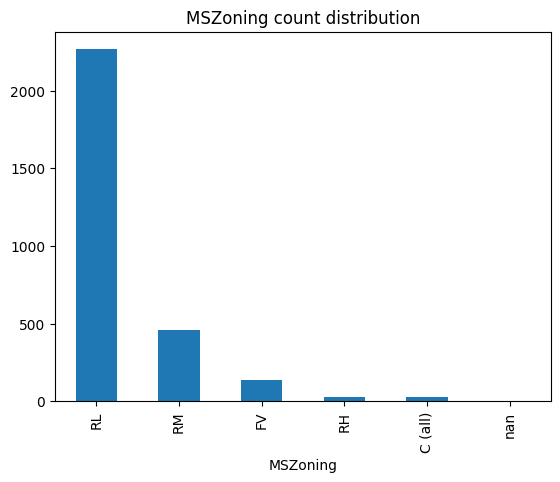

In [1947]:
# Take a look at "MSZoning"
df__houses["MSZoning"].value_counts(dropna=False).plot(kind="bar", title="MSZoning count distribution")

In [1948]:
# Take a look at "MSZoning"
100*df__houses["MSZoning"].value_counts(dropna=False) / df__houses["MSZoning"].value_counts(dropna=False).sum()

MSZoning
RL         77.595067
RM         15.758822
FV          4.761905
RH          0.890716
C (all)     0.856458
NaN         0.137033
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

- Only 0.14% of houses have a missing zone classification, and most of houses (77.6%) sold are in a residential low zone.
- We decide to replace any other modalities different from "RL", including missing values by "Other".
</div>

<Axes: title={'center': 'MSZoningTransformed count distribution'}, xlabel='MSZoningTransformed'>

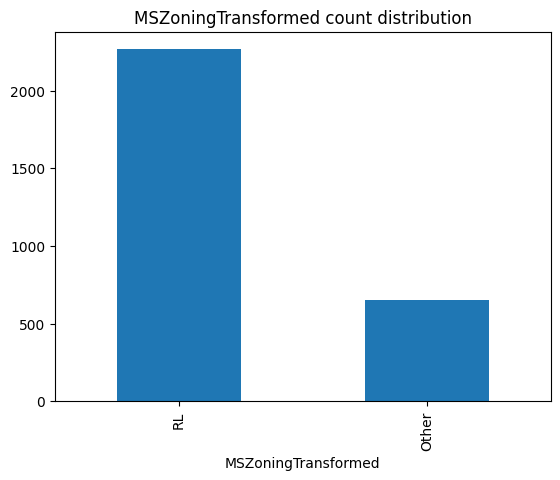

In [1949]:
# Transform "MSZoning" to "MSZoningTransformed"

# Replace missing values
df__houses["MSZoningTransformed"] = df__houses["MSZoning"].replace(to_replace=np.nan, value="Other")

# Transform any modality different from "RL" into "Other"
df__houses["MSZoningTransformed"] = df__houses["MSZoningTransformed"].apply(lambda x: "Other" if x != "RL" else x)

# Cleanup
del df__houses["MSZoning"]

# Take at look at "MSZoningTransformed"
df__houses["MSZoningTransformed"].value_counts(dropna=False).plot(kind="bar", title="MSZoningTransformed count distribution")

##### 5.2.2. "Alley" : type of alley access to the property

<div style="background-color: green; padding: 10px;">

- Missing values for "Alley" generally means no alley access to the property : we will replace missing value "No".
- Other modalities will be repalced by "Yes".
</div>

<Axes: title={'center': 'AlleyTransformed count distribution'}, xlabel='AlleyTransformed'>

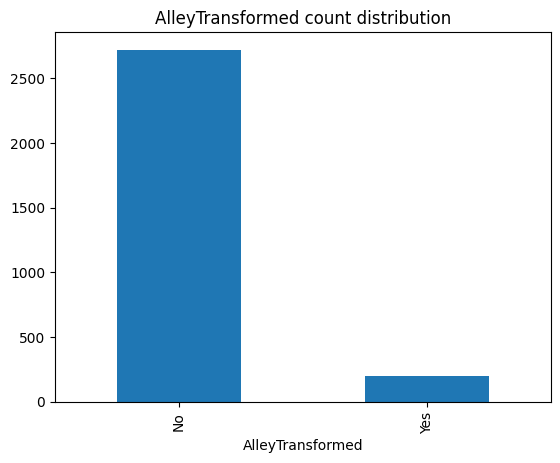

In [1950]:
# Transform "Alley" to "AlleyTransformed"

# Replace missing values
df__houses["AlleyTransformed"] = df__houses["Alley"].replace(to_replace=np.nan, value="No")

# Transform any modality different from "No" into "Yes"
df__houses["AlleyTransformed"] = df__houses["AlleyTransformed"].apply(lambda x: "Yes" if x != "No" else x)

# Cleanup
del df__houses["Alley"]

# Take at look at "AlleyTransformed"
df__houses["AlleyTransformed"].value_counts().plot(kind="bar", title="AlleyTransformed count distribution")


In [1951]:
# Take at look at "AlleyTransformed"
100*df__houses["AlleyTransformed"].value_counts() / df__houses["AlleyTransformed"].value_counts().sum()

AlleyTransformed
No     93.216855
Yes     6.783145
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
93.22% of houses have no alley access, and only 6.78% have one : we decide that since only one of modalities is well represented, we will discard this feature.
</div>

In [1952]:
del df__houses["AlleyTransformed"]

##### 5.2.3. "Utilities" : type of utilities available

<Axes: title={'center': 'Utilities count distribution'}, xlabel='Utilities'>

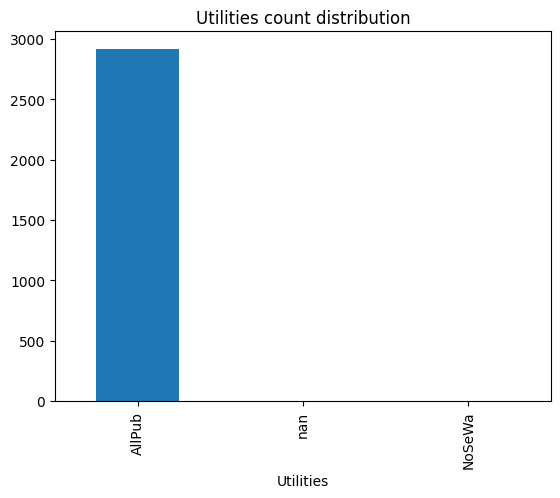

In [1953]:
# Take at look at "Utilities"
df__houses["Utilities"].value_counts(dropna=False).plot(kind="bar", title="Utilities count distribution")

In [1954]:
# Take at look at "Utilities"
100*df__houses["Utilities"].value_counts(dropna=False) / df__houses["Utilities"].value_counts(dropna=False).sum()

Utilities
AllPub    99.897225
NaN        0.068517
NoSeWa     0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
99.9% of houses have all public utilities, and only 0.07%% have missing values : since only one known modality is well represented, we will discard this feature.
</div>

In [1955]:
# Cleanup
del df__houses["Utilities"]

##### 5.2.4. "Exterior1st", "Exterior2nd" : exterior covering on house

<Axes: title={'center': 'Exterior1st count distribution'}, xlabel='Exterior1st'>

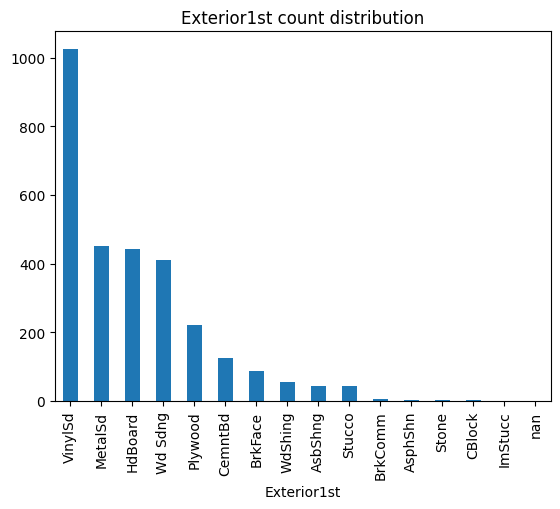

In [1956]:
# Take at look at "Exterior1st"
df__houses["Exterior1st"].value_counts(dropna=False).plot(kind="bar", title="Exterior1st count distribution")

In [1957]:
# Take at look at "Exterior1st"
100*df__houses["Exterior1st"].value_counts(dropna=False) / df__houses["Exterior1st"].value_counts(dropna=False).sum()

Exterior1st
VinylSd    35.114765
MetalSd    15.416238
HdBoard    15.142172
Wd Sdng    14.080164
Plywood     7.571086
CemntBd     4.316547
BrkFace     2.980473
WdShing     1.918465
AsbShng     1.507366
Stucco      1.473107
BrkComm     0.205550
AsphShn     0.068517
Stone       0.068517
CBlock      0.068517
ImStucc     0.034258
NaN         0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
We will keep the first four most present modalities, then regroup the rest as one modality called "Other".
</div>

<Axes: title={'center': 'Exterior1stTransformed count distribution'}, xlabel='Exterior1stTransformed'>

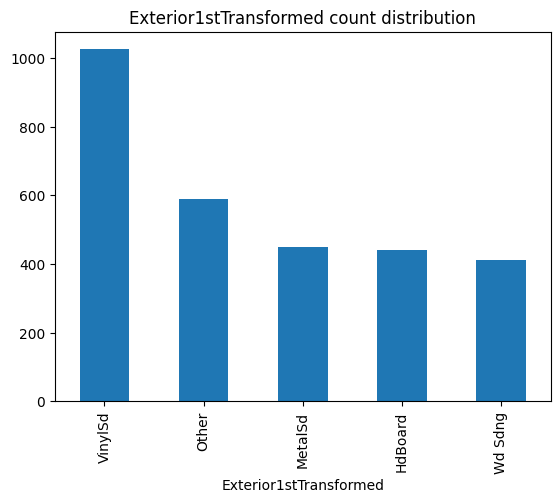

In [1958]:
# Transform "Exterior1st" into "Exterior1stTransformed"
df__houses["Exterior1stTransformed"] = df__houses["Exterior1st"].apply(lambda x: x if x in ["VinylSd", "MetalSd", "HdBoard", "Wd Sdng"] else "Other")

# Cleanup
del df__houses["Exterior1st"]

# Take at look at "Exterior1stTransformed"
df__houses["Exterior1stTransformed"].value_counts(dropna=False).plot(kind="bar", title="Exterior1stTransformed count distribution")

<Axes: title={'center': 'Exterior2nd count distribution'}, xlabel='Exterior2nd'>

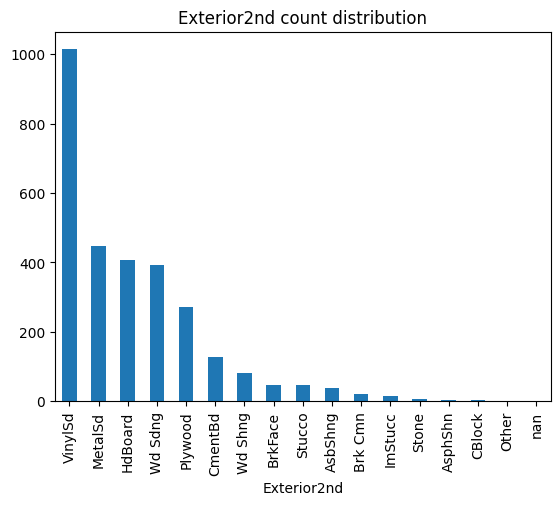

In [1959]:
# Take at look at "Exterior2nd"
df__houses["Exterior2nd"].value_counts(dropna=False).plot(kind="bar", title="Exterior2nd count distribution")

In [1960]:
# Take at look at "Exterior2nd"
100*df__houses["Exterior2nd"].value_counts(dropna=False) / df__houses["Exterior2nd"].value_counts(dropna=False).sum()

Exterior2nd
VinylSd    34.737924
MetalSd    15.313464
HdBoard    13.908873
Wd Sdng    13.394998
Plywood     9.249743
CmentBd     4.316547
Wd Shng     2.774923
BrkFace     1.610140
Stucco      1.610140
AsbShng     1.301816
Brk Cmn     0.753683
ImStucc     0.513875
Stone       0.205550
AsphShn     0.137033
CBlock      0.102775
Other       0.034258
NaN         0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Generally, "Exterior2nd" has missing values (less than 1% of houses) when there's no second material covering the house. The first four material most present (same modalities as "Exterior1st") distributions are similar to those of "Exterior1st".
Based on these facts, we decide to discard this feature.
</div>

In [1961]:
# Cleanup
del df__houses["Exterior2nd"]

##### 5.2.5. "MasVnrType" : masonry veneer type

<Axes: title={'center': 'MasVnrType count distribution'}, xlabel='MasVnrType'>

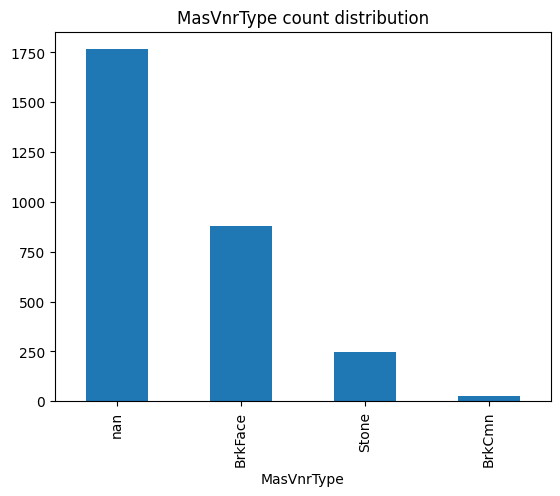

In [1962]:
# Take a look at "MasVnrType"
df__houses["MasVnrType"].value_counts(dropna=False).plot(kind="bar", title="MasVnrType count distribution")

In [1963]:
# Take a look at "MasVnrType"
100*df__houses["MasVnrType"].value_counts(dropna=False) / df__houses["MasVnrType"].value_counts(dropna=False).sum()

MasVnrType
NaN        60.500171
BrkFace    30.113052
Stone       8.530319
BrkCmn      0.856458
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Generally, "MasVnrType" has missing values when there's no masonry veneer for the house (60.5% of houses). We decide to replace missing values by a modality called "No", all other modalities will be replaced by "Yes".
</div>

<Axes: title={'center': 'MasVnrTypeTransformed count distribution'}, xlabel='MasVnrTypeTransformed'>

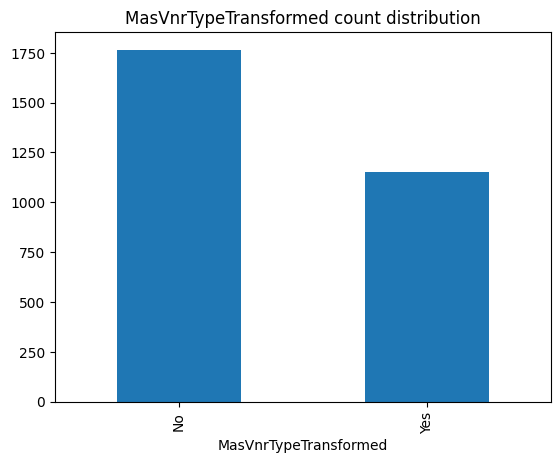

In [1964]:
# Transform "MasVnrType" into "MasVnrTypeTransformed"
# Replace missing values
df__houses["MasVnrTypeTransformed"] = df__houses["MasVnrType"].replace(to_replace=np.nan, value="No")
# Regroup other modalities different from "No" as "Yes"
df__houses["MasVnrTypeTransformed"]  = df__houses["MasVnrTypeTransformed"].apply(lambda x: "Yes" if x != "No" else x)

# Cleanup
del df__houses["MasVnrType"]

# Take a look at "MasVnrTypeTransformed"
df__houses["MasVnrTypeTransformed"].value_counts().plot(kind="bar", title="MasVnrTypeTransformed count distribution")

##### 5.2.6. "BsmtQual" : height of basement

<Axes: title={'center': 'BsmtQual count distribution'}, xlabel='BsmtQual'>

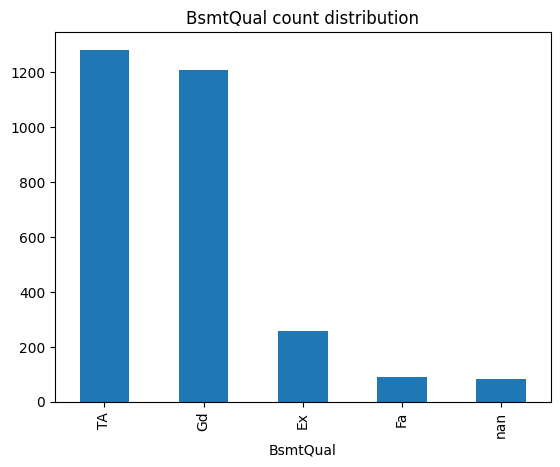

In [1965]:
# Take a look at "BsmtQual"
df__houses["BsmtQual"].value_counts(dropna=False).plot(kind="bar", title="BsmtQual count distribution")

<div style="background-color: green; padding: 10px;">

- Generally, "BsmtQual" has missing values when there's no basement present in the house.

- Each modality has a meaning provided such that we can identify some numeric values (discrete values) to the basement height of each house.

- We prefer to have "TA" be replaced by 89 inches, "Gd" by 99 inches, "Ex" by 100 inches, "Fa" by 79 inches and nan by 0 inch.
</div>

<Axes: title={'center': 'BsmtHeight count distribution'}, xlabel='BsmtHeight'>

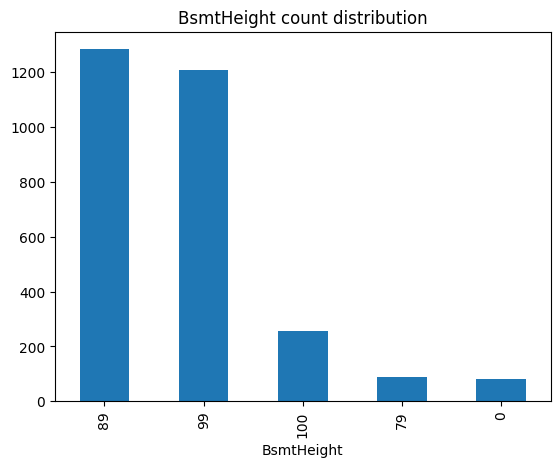

In [1966]:
# Replace missing values in "BsmtQual"
df__houses["BsmtQual"] = df__houses["BsmtQual"].replace(to_replace=np.nan, value="0")

# Transform "BsmtQual" into "BsmtHeight"
df__houses["BsmtHeight"] = df__houses["BsmtQual"].apply(
    lambda x: 89 if x == "TA" else 99 if x == "Gd" else 100 if x == "Ex" else 79 if x == "Fa" else 0)

# Cleanup
del df__houses["BsmtQual"]

# Take a look at "BsmtHeight"
df__houses["BsmtHeight"].value_counts().plot(kind="bar", title="BsmtHeight count distribution")

<div style="background-color: green; padding: 10px;">
We will transform "BsmtHeight" into a new covariate called "BsmtHeightTransformed" : we estimate a false min 2 times less than the actual min and a false max up to 2 times higher than the actual max to scale between 0 and 1 the actual covariate.
</div>

In [1967]:
# Be careful of how to scale

# Compute false min and max based on the training samples
float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)]["BsmtHeight"].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)]["BsmtHeight"].max()

# Set an initial value to "BsmtHeightTransformed"
df__houses["BsmtHeightTransformed"] = np.nan

# Scale training samples
df__houses.loc[df__houses["Id"].isin(list__trainids), "BsmtHeightTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__trainids), "BsmtHeight"] - float__falsemin) / (float__falsemax - float__falsemin)

# Scale test samples
df__houses.loc[df__houses["Id"].isin(list__testids), "BsmtHeightTransformed"] = (df__houses.loc[df__houses["Id"].isin(list__testids), "BsmtHeight"] - float__falsemin) / (float__falsemax - float__falsemin)

# Cleanup
del float__falsemin, float__falsemax, df__houses["BsmtHeight"]

<Axes: title={'center': 'BsmtHeightTransformed count distribution'}, xlabel='BsmtHeightTransformed'>

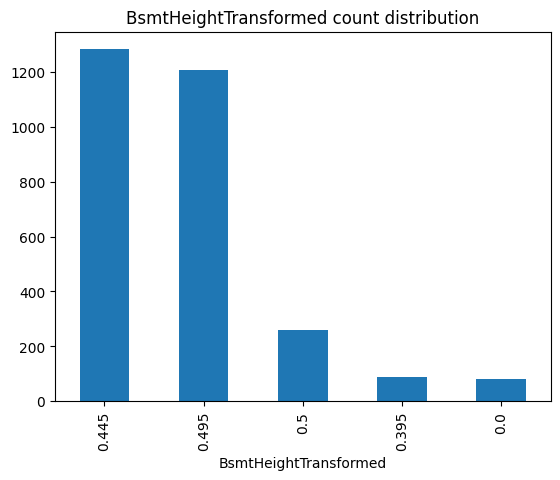

In [1968]:
# Take a look at "BsmtHeightTransformed"
df__houses["BsmtHeightTransformed"].value_counts().plot(kind="bar", title="BsmtHeightTransformed count distribution")

##### 5.2.7. "BsmtCond" : general condition of basement

<Axes: title={'center': 'BsmtCond count distribution'}, xlabel='BsmtCond'>

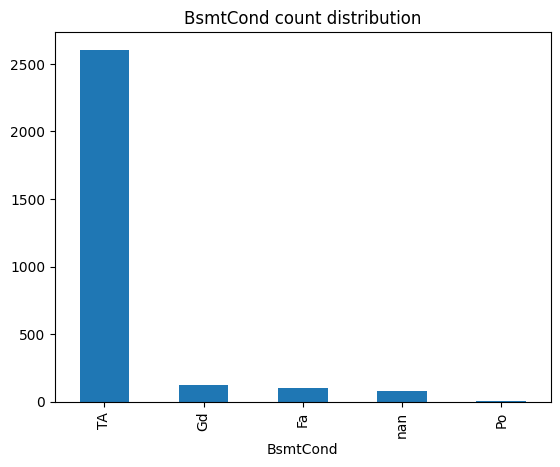

In [1969]:
# Take a look at "BsmtCond"
df__houses["BsmtCond"].value_counts(dropna=False).plot(kind="bar", title="BsmtCond count distribution")

In [1970]:
# Take a look at "BsmtCond"
100*df__houses["BsmtCond"].value_counts(dropna=False) / df__houses["BsmtCond"].value_counts(dropna=False).sum()

BsmtCond
TA     89.277150
Gd      4.179514
Fa      3.562864
NaN     2.809181
Po      0.171292
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
"BsmtCond" has missing values for houses with no basement, and only 0.17% of houses have basement in poor condition. We won't consider this feature further in our analysis.
</div>

In [1971]:
# Cleanup
del df__houses["BsmtCond"]

##### 5.2.8. "BsmtExposure" : walkout or garden level walls

<Axes: title={'center': 'BsmtExposure count distribution'}, xlabel='BsmtExposure'>

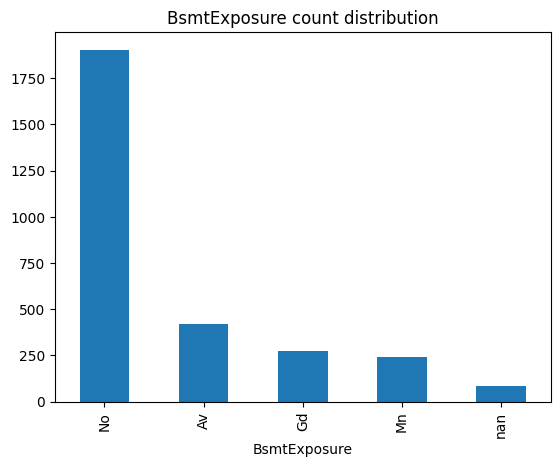

In [1972]:
# Take a look at "BsmtExposure"
df__houses["BsmtExposure"].value_counts(dropna=False).plot(kind="bar", title="BsmtExposure count distribution")

In [1973]:
# Take a look at "BsmtExposure"
100*df__houses["BsmtExposure"].value_counts(dropna=False) / df__houses["BsmtExposure"].value_counts(dropna=False).sum()

BsmtExposure
No     65.227818
Av     14.319973
Gd      9.455293
Mn      8.187736
NaN     2.809181
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
"BsmtExposure" has missing values for houses with no exposure. We will replace missing values by a new modality called "NoBasement".
</div>

<Axes: title={'center': 'BsmtExposureTransformed count distribution'}, xlabel='BsmtExposureTransformed'>

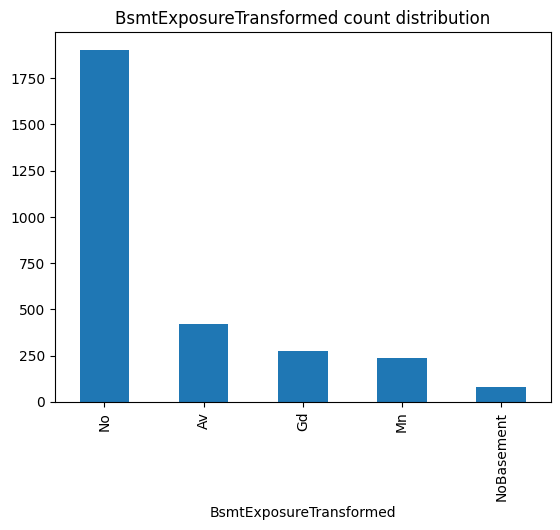

In [1974]:
# Transform "BsmtExposure" into "BsmtExposureTransformed"
df__houses["BsmtExposureTransformed"] = df__houses["BsmtExposure"].replace(to_replace=np.nan, value="NoBasement")

# Cleanup
del df__houses["BsmtExposure"]

# Take a look at "BsmtExposureTransformed"
df__houses["BsmtExposureTransformed"].value_counts().plot(kind="bar", title="BsmtExposureTransformed count distribution")

##### 5.2.9. "BsmtFinType1", "BsmtFinType2" : rating of basement finished area

<div style="background-color: green; padding: 10px;">
Both "BsmtFinType1", "BsmtFinType2" have missing values for houses with no basement. Missing values will be replaced by a new modality called "NoBasement". 
</div>

In [1975]:
# Transform "BsmtFinType1", "BsmtFinType2" into "BsmtFinType1Transformed", "BsmtFinType2Transformed"
df__houses["BsmtFinType1Transformed"] = df__houses["BsmtFinType1"].replace(to_replace=np.nan, value="NoBasement")
df__houses["BsmtFinType2Transformed"] = df__houses["BsmtFinType2"].replace(to_replace=np.nan, value="NoBasement")

# Cleanup
df__houses.drop(columns=["BsmtFinType1", "BsmtFinType2"], inplace=True)

<Axes: title={'center': 'BsmtFinType1Transformed count distribution'}, xlabel='BsmtFinType1Transformed'>

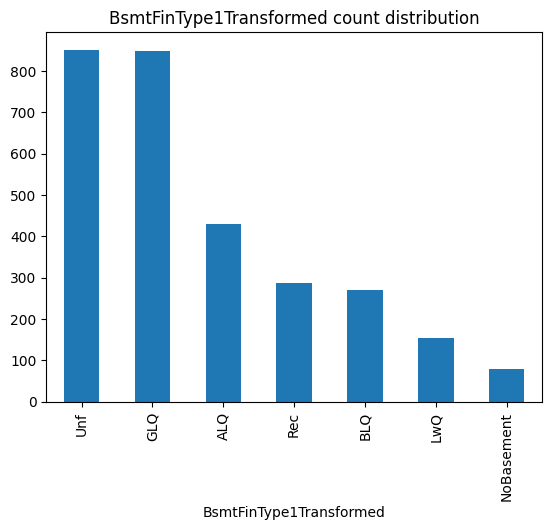

In [1976]:
# Take a look at "BsmtFinType1Transformed"
df__houses["BsmtFinType1Transformed"].value_counts().plot(kind="bar", title="BsmtFinType1Transformed count distribution")

<Axes: title={'center': 'BsmtFinType2Transformed count distribution'}, xlabel='BsmtFinType2Transformed'>

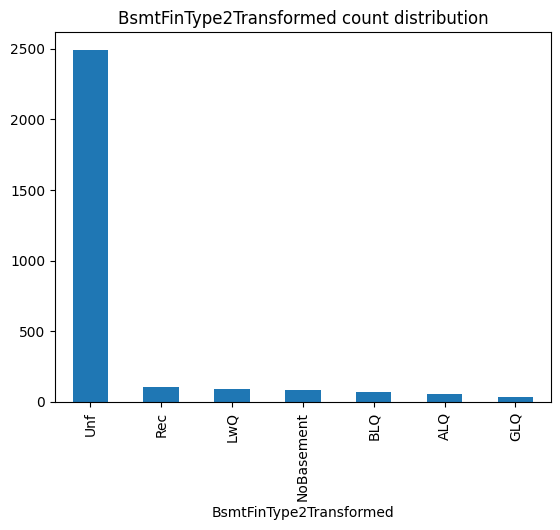

In [1977]:
# Take a look at "BsmtFinType2Transformed"
df__houses["BsmtFinType2Transformed"].value_counts().plot(kind="bar", title="BsmtFinType2Transformed count distribution")

In [1978]:
# Take a look at "BsmtFinType2Transformed"
100*df__houses["BsmtFinType2Transformed"].value_counts() / df__houses["BsmtFinType2Transformed"].value_counts().sum()

BsmtFinType2Transformed
Unf           85.405961
Rec            3.597122
LwQ            2.980473
NoBasement     2.740665
BLQ            2.329565
ALQ            1.781432
GLQ            1.164782
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

Only 2.74% have no basement for the feature "BsmtFinType2Transformed", and at the same time 85% of houses have "UnF" modality. Based both facts and the provided visualization for this feature, we decide to discard any further analysis on this feature.

For the feature "BsmtFinType1Transformed", we regroup :
- "ALQ" (Average Living Quarters) and "Rec" (Average Rec Room) as "Average" ;
- "BLQ" (Below Average Living Quarters) and "LwQ" (Low Quality) as "Low".
</div>

<Axes: title={'center': 'BsmtFinType1Transformed count distribution'}, xlabel='BsmtFinType1Transformed'>

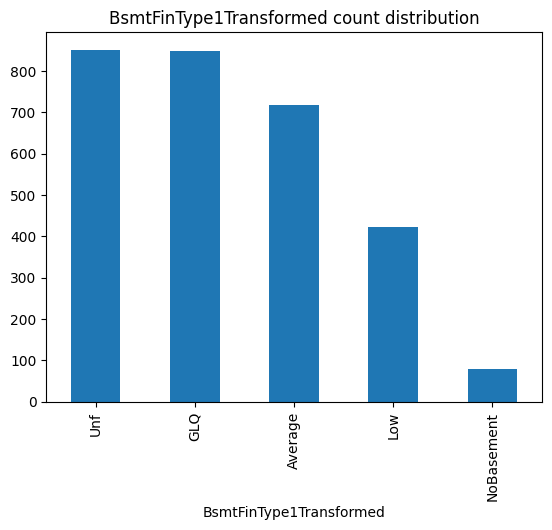

In [1979]:
# Cleanup
del df__houses["BsmtFinType2Transformed"]

# Regroup "BsmtFinType1Transformed" modalities
df__houses["BsmtFinType1Transformed"] = df__houses["BsmtFinType1Transformed"].apply(lambda x: "Average" if x in ["ALQ", "Rec"] else "Low" if x in ["BLQ", "LwQ"] else x)

# Take a look at "BsmtFinType1Transformed"
df__houses["BsmtFinType1Transformed"].value_counts().plot(kind="bar", title="BsmtFinType1Transformed count distribution")

##### 5.2.10. "Electrical" : house electrical system

<Axes: title={'center': 'Electrical count distribution'}, xlabel='Electrical'>

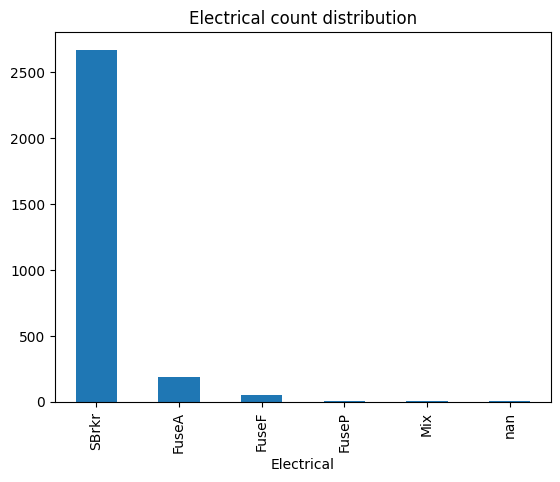

In [1980]:
# Take a look at "Electrical"
df__houses["Electrical"].value_counts(dropna=False).plot(kind="bar", title="Electrical count distribution")

In [1981]:
# Take a look at "Electrical"
100*df__houses["Electrical"].value_counts(dropna=False) / df__houses["Electrical"].value_counts(dropna=False).sum()

Electrical
SBrkr    91.503940
FuseA     6.440562
FuseF     1.712915
FuseP     0.274066
Mix       0.034258
NaN       0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
0.03% of houses have missing information about their electrical system, and most of houses (91.5%) have a Standard Circuit Breakers & Romex as electrical system meaning that only one modality is well represented : this feature will be discarded.
</div>

In [1982]:
# Cleanup
del df__houses["Electrical"]

##### 5.2.11. "Functional" : home functionality

<Axes: title={'center': 'Functional count distribution'}, xlabel='Functional'>

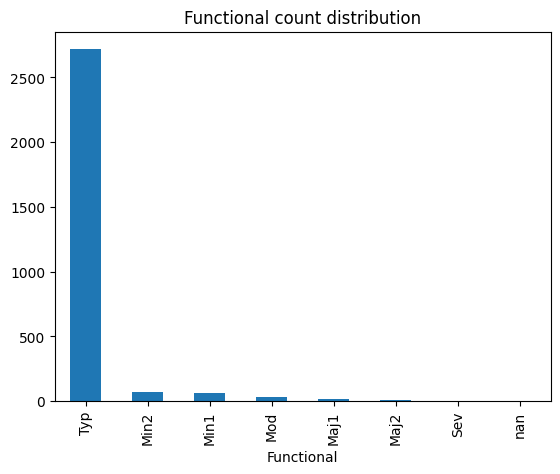

In [1983]:
# Take a look at "Functional"
df__houses["Functional"].value_counts(dropna=False).plot(kind="bar", title="Functional count distribution")

In [1984]:
# Take a look at "Functional"
100*df__houses["Functional"].value_counts(dropna=False) / df__houses["Functional"].value_counts(dropna=False).sum()

Functional
Typ     93.079822
Min2     2.398082
Min1     2.226790
Mod      1.199041
Maj1     0.650908
Maj2     0.308325
Sev      0.068517
NaN      0.068517
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
0.06% of houses have missing information, and most of houses (93.08%) have a typical functionality meaning that only one modality is well represented : this feature will be discarded.
</div>

In [1985]:
# Cleanup
del df__houses["Functional"]

##### 5.2.12. "FireplaceQu" : fireplace quality

<div style="background-color: green; padding: 10px;">
Houses with missing information have no fireplace : missing values will be replaced by a modality called "NoFireplace".
</div>

<Axes: title={'center': 'FireplaceQuTransformed count distribution'}, xlabel='FireplaceQuTransformed'>

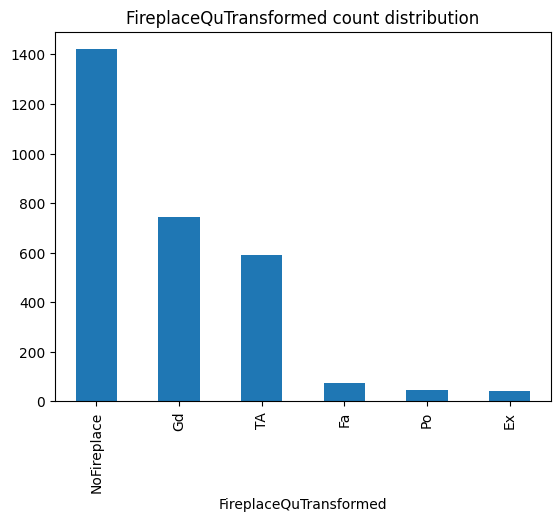

In [1986]:
# Transform "FireplaceQu" into "FireplaceQuTransformed"
df__houses["FireplaceQuTransformed"] = df__houses["FireplaceQu"].replace(to_replace=np.nan, value="NoFireplace")

# Cleanup
del df__houses["FireplaceQu"]

# Take a look at "FireplaceQuTransformed"
df__houses["FireplaceQuTransformed"].value_counts().plot(kind="bar", title="FireplaceQuTransformed count distribution")

In [1987]:
# Take a look at "FireplaceQuTransformed"
100*df__houses["FireplaceQuTransformed"].value_counts() / df__houses["FireplaceQuTransformed"].value_counts().sum()

FireplaceQuTransformed
NoFireplace    48.646797
Gd             25.488181
TA             20.280918
Fa              2.535115
Po              1.575882
Ex              1.473107
Name: count, dtype: float64

##### 5.2.13. "GarageType" : garage location / type

<div style="background-color: green; padding: 10px;">
Houses with missing information have no garage : missing values will be replaced by a modality called "NoGarage".
</div>

<Axes: title={'center': 'GarageTypeTransformed count distribution'}, xlabel='GarageTypeTransformed'>

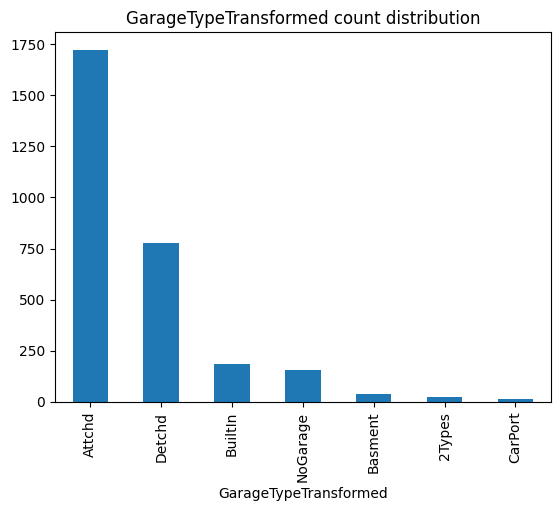

In [1988]:
# Transform "GarageType" into "GarageTypeTransformed"
df__houses["GarageTypeTransformed"] = df__houses["GarageType"].replace(to_replace=np.nan, value="NoGarage")

# Cleanup
del df__houses["GarageType"]

# Take a look at "GarageTypeTransformed"
df__houses["GarageTypeTransformed"].value_counts().plot(kind="bar", title="GarageTypeTransformed count distribution")

In [1989]:
# Take a look at "GarageTypeTransformed"
100*df__houses["GarageTypeTransformed"].value_counts() / df__houses["GarageTypeTransformed"].value_counts().sum()

GarageTypeTransformed
Attchd      59.027064
Detchd      26.687222
BuiltIn      6.372045
NoGarage     5.378554
Basment      1.233299
2Types       0.787941
CarPort      0.513875
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
We will regroup "BuiltIn", "Basment", "2Types" and "CarPort" modalities as one called "Other".
</div>

<Axes: title={'center': 'GarageTypeTransformed count distribution'}, xlabel='GarageTypeTransformed'>

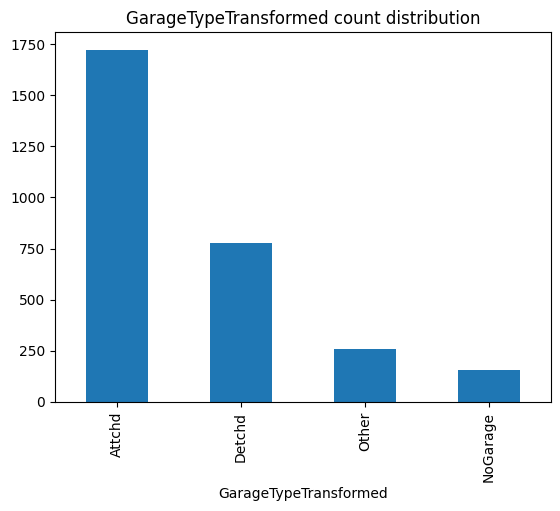

In [1990]:
# Regroup "BuiltIn", "Basment", "2Types" and "CarPort" modalities as "Other"
df__houses["GarageTypeTransformed"] = df__houses["GarageTypeTransformed"].apply(lambda x: "Other" if x in ["BuiltIn", "Basment", "2Types", "CarPort"] else x)

# Take a look at "GarageTypeTransformed"
df__houses["GarageTypeTransformed"].value_counts().plot(kind="bar", title="GarageTypeTransformed count distribution")

##### 5.2.14. "GarageFinish" : interior finish of the garage

<div style="background-color: green; padding: 10px;">
Houses with missing information have no garage : missing values will be replaced by a modality called "NoGarage".
</div>

<Axes: title={'center': 'GarageFinishTransformed count distribution'}, xlabel='GarageFinishTransformed'>

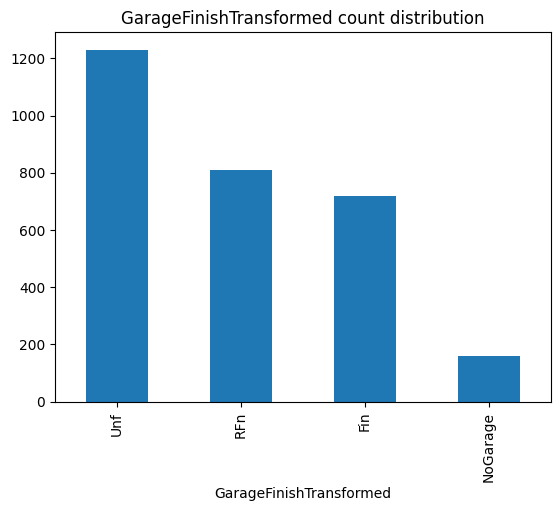

In [1991]:
# Transform "GarageFinish" into "GarageFinishTransformed"
df__houses["GarageFinishTransformed"] = df__houses["GarageFinish"].replace(to_replace=np.nan, value="NoGarage")

# Cleanup
del df__houses["GarageFinish"]

# Take a look at "GarageFinishTransformed"
df__houses["GarageFinishTransformed"].value_counts().plot(kind="bar", title="GarageFinishTransformed count distribution")

##### 5.2.15. "GarageQual" : garage quality

<div style="background-color: green; padding: 10px;">
Houses with missing information have no garage : missing values will be replaced by a modality called "NoGarage".
</div>

<Axes: title={'center': 'GarageQualTransformed count distribution'}, xlabel='GarageQualTransformed'>

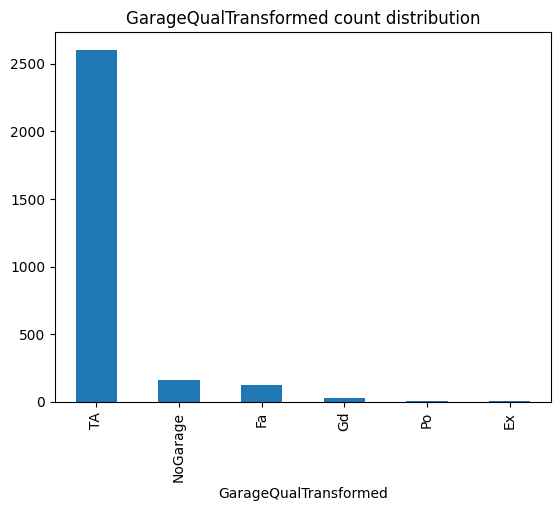

In [1992]:
# Transform "GarageQual" into "GarageQualTransformed"
df__houses["GarageQualTransformed"] = df__houses["GarageQual"].replace(to_replace=np.nan, value="NoGarage")

# Cleanup
del df__houses["GarageQual"]

# Take a look at "GarageQualTransformed"
df__houses["GarageQualTransformed"].value_counts().plot(kind="bar", title="GarageQualTransformed count distribution")

In [1993]:
# Take a look at "GarageQualTransformed"
100*df__houses["GarageQualTransformed"].value_counts() / df__houses["GarageQualTransformed"].value_counts().sum()

GarageQualTransformed
TA          89.208633
NoGarage     5.447071
Fa           4.248030
Gd           0.822199
Po           0.171292
Ex           0.102775
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
0.17% of houses have a poor garage quality, and 5.45% have no garage. Based on these facts and the provided visualization, we discard this covariate.
</div>

In [1994]:
# Cleanup
del df__houses["GarageQualTransformed"]

##### 5.2.16. "GarageCond" : garage condition

<div style="background-color: green; padding: 10px;">
Houses with missing information have no garage : missing values will be replaced by a modality called "NoGarage".
</div>

<Axes: title={'center': 'GarageCondTransformed count distribution'}, xlabel='GarageCondTransformed'>

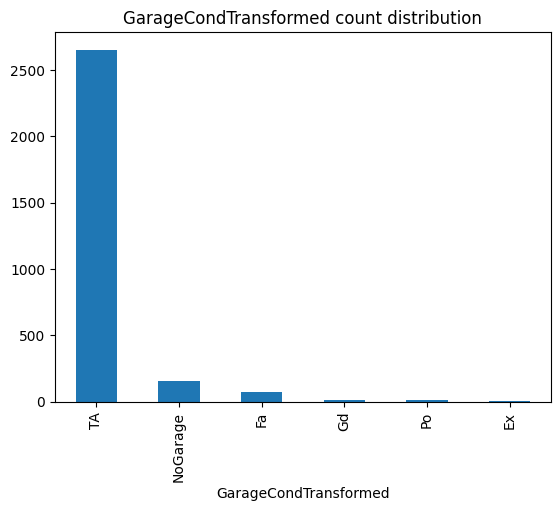

In [1995]:
# Transform "GarageCond" into "GarageCondTransformed"
df__houses["GarageCondTransformed"] = df__houses["GarageCond"].replace(to_replace=np.nan, value="NoGarage")

# Cleanup
del df__houses["GarageCond"]

# Take a look at "GarageCondTransformed"
df__houses["GarageCondTransformed"].value_counts().plot(kind="bar", title="GarageCondTransformed count distribution")

In [1996]:
# Take a look at "GarageCondTransformed"
100*df__houses["GarageCondTransformed"].value_counts() / df__houses["GarageCondTransformed"].value_counts().sum()

GarageCondTransformed
TA          90.921548
NoGarage     5.447071
Fa           2.535115
Gd           0.513875
Po           0.479616
Ex           0.102775
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Less than 1% of houses have a poor garage condition, and 5.45% have no garage : based on these facts and the provided visualization, we decide to discard this feature.
</div>

In [1997]:
# Cleanup
del df__houses["GarageCondTransformed"]

##### 5.2.17. "PoolQC" : pool quality

<div style="background-color: green; padding: 10px;">
Houses with missing information have no pool : missing values will be replaced by a modality called "NoPool".
</div>

<Axes: title={'center': 'PoolQCTransformed count distribution'}, xlabel='PoolQCTransformed'>

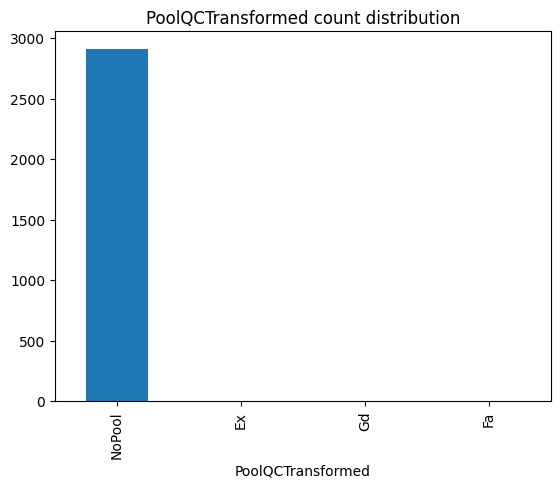

In [1998]:
# Transform "PoolQC" into "PoolQCTransformed"
df__houses["PoolQCTransformed"] = df__houses["PoolQC"].replace(to_replace=np.nan, value="NoPool")

# Cleanup
del df__houses["PoolQC"]

# Take a look at "PoolQCTransformed"
df__houses["PoolQCTransformed"].value_counts().plot(kind="bar", title="PoolQCTransformed count distribution")

In [1999]:
# Take a look at "PoolQCTransformed"
100*df__houses["PoolQCTransformed"].value_counts() / df__houses["PoolQCTransformed"].value_counts().sum()

PoolQCTransformed
NoPool    99.657417
Ex         0.137033
Gd         0.137033
Fa         0.068517
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Most of houses (99.67%) have no pool meaning that only one modality is present : we discard this covariate.
</div>

In [2000]:
del df__houses["PoolQCTransformed"]

##### 5.2.18. "Fence" : fence quality

<div style="background-color: green; padding: 10px;">
Houses with missing information have no fence : missing values will be replaced by a modality called "NoFence".
</div>

<Axes: title={'center': 'FenceTransformed count distribution'}, xlabel='FenceTransformed'>

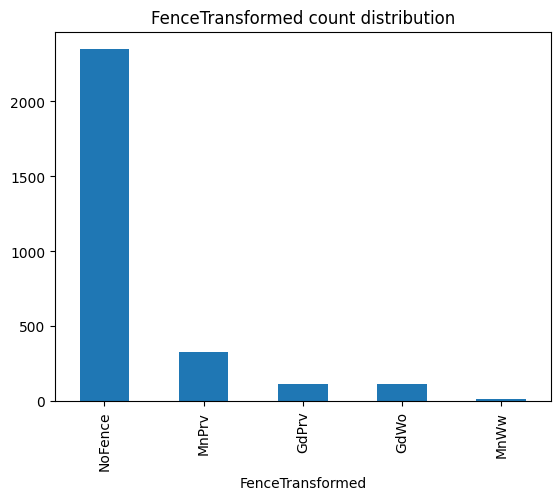

In [2001]:
# Transform "Fence" into "FenceTransformed"
df__houses["FenceTransformed"] = df__houses["Fence"].replace(to_replace=np.nan, value="NoFence")

# Cleanup
del df__houses["Fence"]

# Take a look at "FenceTransformed"
df__houses["FenceTransformed"].value_counts().plot(kind="bar", title="FenceTransformed count distribution")

In [2002]:
# Take a look at "FenceTransformed"
100*df__houses["FenceTransformed"].value_counts() / df__houses["FenceTransformed"].value_counts().sum()

FenceTransformed
NoFence    80.438506
MnPrv      11.270983
GdPrv       4.042480
GdWo        3.836930
MnWw        0.411100
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">

We decide to regroup "FenceTransformed" as follow :
- "MnPrv" (Minimum Privacy) and "MnWw" (Minimum Wood/Wire) as "Minimum" ;
- "GdPrv" (Good Privacy) and "GdWo" (Good Wood) as "Good" .
</div>

In [2003]:
# Regroup "FenceTransformed" modalities
df__houses["FenceTransformed"] = df__houses["FenceTransformed"].apply(lambda x: "Good" if x in ["GdPrv", "GdWo"] else "Minimum" if x in ["MnPrv", "MnWw"] else x)

<Axes: title={'center': 'FenceTransformed count distribution'}, xlabel='FenceTransformed'>

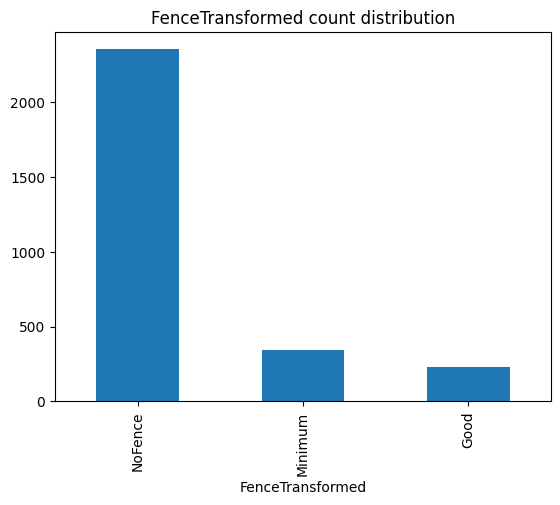

In [2004]:
# Take a look at "FenceTransformed"
df__houses["FenceTransformed"].value_counts().plot(kind="bar", title="FenceTransformed count distribution")

##### 5.2.19. "MiscFeature" : miscellaneous feature

<div style="background-color: green; padding: 10px;">
Houses with missing information have no miscellaneous feature : missing values will be replaced by a modality called "NoMisc".
</div>

<Axes: title={'center': 'MiscFeatureTransformed count distribution'}, xlabel='MiscFeatureTransformed'>

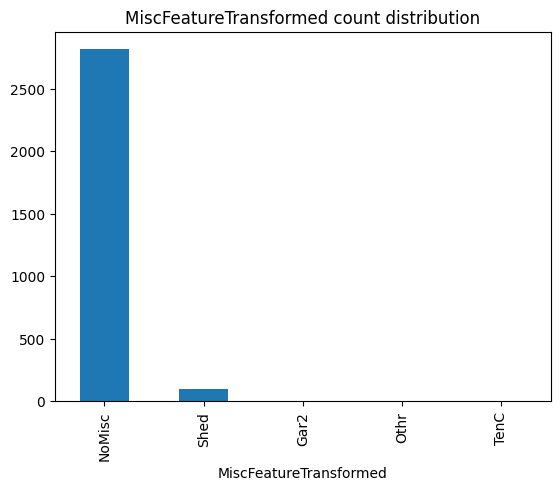

In [2005]:
# Transform "MiscFeature" into "MiscFeatureTransformed"
df__houses["MiscFeatureTransformed"] = df__houses["MiscFeature"].replace(to_replace=np.nan, value="NoMisc")

# Cleanup
del df__houses["MiscFeature"]

# Take a look at "MiscFeatureTransformed"
df__houses["MiscFeatureTransformed"].value_counts().plot(kind="bar", title="MiscFeatureTransformed count distribution")

In [2006]:
# Take a look at "MiscFeatureTransformed"
100*df__houses["MiscFeatureTransformed"].value_counts() / df__houses["MiscFeatureTransformed"].value_counts().sum()

MiscFeatureTransformed
NoMisc    96.402878
Shed       3.254539
Gar2       0.171292
Othr       0.137033
TenC       0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Most of houses (96.4%) have miscellaneous feature meaning that only one modality is present : we discard this covariate.
</div>

In [2007]:
# Cleanup
del df__houses["MiscFeatureTransformed"]

##### 5.2.20. "KitchenQual" : kitchen quality

<Axes: title={'center': 'KitchenQual count distribution'}, xlabel='KitchenQual'>

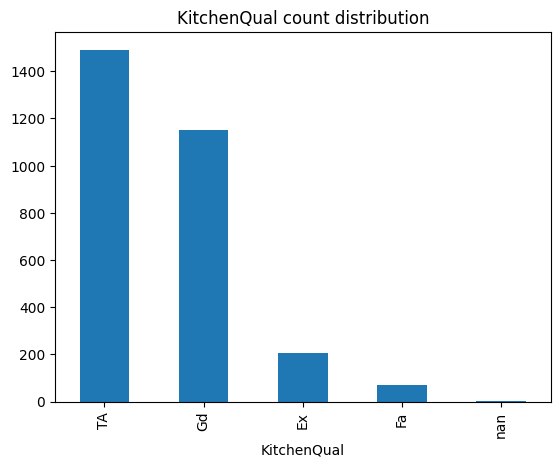

In [2008]:
# Take a look at "KitchenQual"
df__houses["KitchenQual"].value_counts(dropna=False).plot(kind="bar", title="KitchenQual count distribution")

In [2009]:
# Take a look at "KitchenQual"
100*df__houses["KitchenQual"].value_counts(dropna=False) / df__houses["KitchenQual"].value_counts(dropna=False).sum()

KitchenQual
TA     51.113395
Gd     39.431312
Ex      7.022953
Fa      2.398082
NaN     0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Only 0.03% of houses have no information about their kitchen quality, and other houses have their kitchen in at least average condition :  we decide to discard this feature. 
</div>

In [2010]:
del df__houses["KitchenQual"]

##### 5.2.21. "SaleType" : type of sale

<Axes: title={'center': 'SaleType count distribution'}, xlabel='SaleType'>

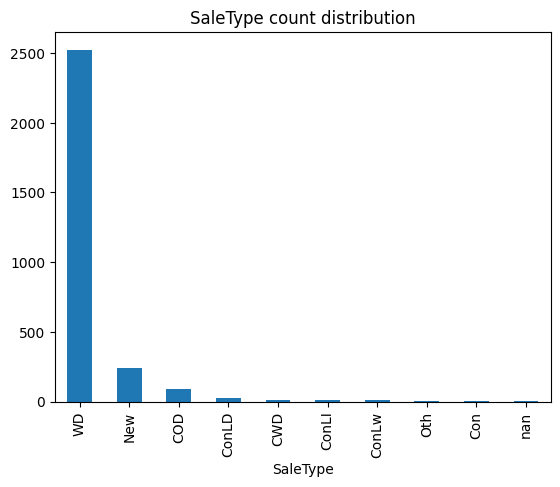

In [2011]:
# Take a look at "SaleType"
df__houses["SaleType"].value_counts(dropna=False).plot(kind="bar", title="SaleType count distribution")

In [2012]:
# Take a look at "SaleType"
100*df__houses["SaleType"].value_counts(dropna=False) / df__houses["SaleType"].value_counts(dropna=False).sum()

SaleType
WD       86.502227
New       8.187736
COD       2.980473
ConLD     0.890716
CWD       0.411100
ConLI     0.308325
ConLw     0.274066
Oth       0.239808
Con       0.171292
NaN       0.034258
Name: count, dtype: float64

<div style="background-color: green; padding: 10px;">
Only 0.03% of houses have no information about their sale type, and most of sales (86.5%) are a Warranty Deed : we decide to discard this feature. 
</div>

In [2013]:
# Cleanup
del df__houses["SaleType"]

##### 5.2.21. Numerical covariates : "LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "GarageYrBlt", "GarageCars", "GarageArea"

In [2014]:
# Specify float and integer covariates
list__floatcols = ["LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
list__intcols = ["BsmtFullBath", "BsmtHalfBath", "GarageYrBlt", "GarageCars", "GarageArea"]
list__allcols = list__floatcols + list__intcols

# Convert all columns data types into float
df__houses[list__allcols] = df__houses[list__allcols].astype(float)

In [2015]:
# Compute samples' number (rows number) with missing infos at this step
df__houses.isnull().any(axis=1).sum()

np.int64(652)

In [2016]:
# Perform an encoding of all categorical columns 

# Get all categorical columns
list__catcovariates = [str__covariate for str__covariate in df__houses.dtypes[df__houses.dtypes == 'object'].index if str__covariate != "Id"]

# Create a dataframe with only training samples
df__table = df__houses[df__houses["Id"].isin(list__trainids)].copy(deep=True)

# Set a counter used to go through each modality of all categorical covariates
int__counter = 0

# Go through each feature
for str__featurename in list__catcovariates:
    
    # Initialize a OneHotEncoder object
    onehotencoder__object = OneHotEncoder(drop="first", sparse_output=False)

    # Fit onehotencoder__object to str__featurename modalities in df__table (training samples)
    onehotencoder__object.fit(df__table[[str__featurename]])
    
    # Perform an encoding of str__featurename modalities in df__houses
    array__feature = onehotencoder__object.transform(df__houses[[str__featurename]])
    # Convert array__feature into a DataFrame
    df__feature = pd.DataFrame(data=array__feature, columns=[str__featurename + "_newfeature" + str(int__i) for int__i in range(int__counter, array__feature.shape[1]+int__counter)])
    # Add df__feature into df__houses
    df__houses = pd.concat([df__houses, df__feature], axis=1)
    # Cleanup
    del df__houses[str__featurename], df__feature

    # Increment int__counter
    int__counter += array__feature.shape[1]

    # Cleanup
    del array__feature, df__table[str__featurename]

# Cleanup
del str__featurename, int__counter, list__catcovariates, df__table, onehotencoder__object

In [2017]:
# Get a list of all other columns not in list__allcols
list__allothercols = [str__covariate for str__covariate in df__houses.columns if str__covariate not in list__allcols + ["Id"]]

# Go through each feature in list__allcols, and use a random forest with 100 trees to impute missing values
for str__target in list__allcols:

    # Look only for training samples, and create a model between str__target and all other features in list__allothercols
    df__table = df__houses[df__houses["Id"].isin(list__trainids)][list__allothercols + [str__target]].copy(deep=True).dropna(axis=0)
    rf__model = RandomForestRegressor(n_estimators=100, min_samples_split=20, random_state=123)
    rf__model.fit(X=np.array(df__table[list__allothercols]), y=np.array(df__table[str__target]))

    # Display R-Squared from training samples without missing infos
    print(f"For {str__target}, R-squared on training samples : {rf__model.score(X=np.array(df__table[list__allothercols]), y=np.array(df__table[str__target]))}")

    # Predict missing values
    df__houses.loc[df__houses[str__target].isna(), str__target] = rf__model.predict(X=np.array(df__houses[df__houses[str__target].isna()][list__allothercols]))

    # Cleanup
    del rf__model, df__table

For LotFrontage, R-squared on training samples : 0.7876418196720787
For MasVnrArea, R-squared on training samples : 0.819942533979374
For BsmtFinSF1, R-squared on training samples : 0.8556008378443326
For BsmtFinSF2, R-squared on training samples : 0.536479349783231
For BsmtUnfSF, R-squared on training samples : 0.8346168129333991
For TotalBsmtSF, R-squared on training samples : 0.9240713623027197
For BsmtFullBath, R-squared on training samples : 0.7002693419707717
For BsmtHalfBath, R-squared on training samples : 0.45979904190368026
For GarageYrBlt, R-squared on training samples : 0.8899502811711835
For GarageCars, R-squared on training samples : 0.8458411463701807
For GarageArea, R-squared on training samples : 0.835479784212688


In [2018]:
# Correct values according to integer columns
df__houses[list__intcols] = df__houses[list__intcols].map(lambda x: int(np.ceil(x)))

In [2019]:
# Display a summary of all columns in list__allcols to make sure no unexpected value has appeared
df__houses[list__allcols].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,69.997837,101.401988,441.272011,49.575471,560.585467,1051.417266,0.430284,0.062008,1977.254197,1.766358,472.803357
std,22.597185,178.851335,455.606014,169.177011,439.584006,441.120498,0.524768,0.246828,25.455369,0.761626,215.392271
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,59.874166,0.000000,0.000000,0.000000,220.000000,793.000000,0.000000,0.000000,1959.000000,1.000000,320.000000
50%,70.000000,0.000000,368.000000,0.000000,467.000000,989.000000,0.000000,0.000000,1978.000000,2.000000,480.000000
75%,80.716245,163.500000,733.000000,0.000000,805.000000,1302.000000,1.000000,0.000000,2001.000000,2.000000,576.000000
max,313.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


In [2020]:
# Anlyze the max of all values less than the current max in "GarageYrBlt"
df__houses.loc[df__houses["GarageYrBlt"] < 2207, "GarageYrBlt"].max()

np.int64(2010)

In [2021]:
# Take care of GarageYrBlt which has a current max year too high : 2207
df__houses.loc[df__houses["GarageYrBlt"] == df__houses["GarageYrBlt"].max(), "GarageYrBlt"] = df__houses.loc[df__houses["GarageYrBlt"] < 2207, "GarageYrBlt"].max()

# Review  "GarageYrBlt"
df__houses[["GarageYrBlt"]].describe()

,GarageYrBlt
count,2919.000000
mean,1977.186708
std,25.104779
min,1895.000000
25%,1959.000000
50%,1978.000000
75%,2001.000000
max,2010.000000


In [2022]:
# Scale all columns in list__allcols (for each feature, we use a false max up to 2 times the real max, and a false min less than 2 times the real min)

# Go through each column in list__allcols
for str__col in list__allcols:

    # Compute false min and max based on the training samples
    float__falsemin, float__falsemax = df__houses[df__houses["Id"].isin(list__trainids)][str__col].min()/2, 2*df__houses[df__houses["Id"].isin(list__trainids)][str__col].max()

    # Create a new column name
    str__newcol = str__col + "Transformed"
    
    # Set an initial value to str__newcol
    df__houses[str__newcol] = np.nan
    
    # Scale training samples
    df__houses.loc[df__houses["Id"].isin(list__trainids), str__newcol] = (df__houses.loc[df__houses["Id"].isin(list__trainids), str__col] - float__falsemin) / (float__falsemax - float__falsemin)
    
    # Scale test samples
    df__houses.loc[df__houses["Id"].isin(list__testids), str__newcol] = (df__houses.loc[df__houses["Id"].isin(list__testids), str__col] - float__falsemin) / (float__falsemax - float__falsemin)
    
    # Cleanup
    del float__falsemin, float__falsemax, df__houses[str__col], str__newcol

# Cleanup
del str__col

In [2023]:
# Cleanup
del list__allcols, list__allothercols, list__columnswithNA, list__columnswithoutNA, list__floatcols, list__intcols, str__target, list__trainids

##### *5.3. Retrieve engineered versions of df__train and df__test*

In [2024]:
# Get engineered version of df__train
df__engineeredtrain = df__train[["Id", "SalePrice"]].merge(right=df__houses, on=["Id"], how="left").drop_duplicates()

# Get engineered version of df__test
df__engineeredtest = df__test[["Id"]].merge(right=df__houses, on=["Id"], how="left").drop_duplicates()

# Cleanup
del df__houses

#### 6. Advanced feature engineering (using all possible relations between covariates and the target SalePrice)

##### *6.1. Detect covariates highly correlated with "SalePrice"*

In [2025]:
# Get a list of all current covariates
list__covariates = [str__covariate for str__covariate in df__engineeredtrain.columns if str__covariate not in ["Id", "SalePrice"]]

# Create an empty list where we will keep covariates highly correlated with "SalePrice"
list__highcovariates = []

# Loop through all covariate and compute their correlation with "SalePrice"
for str__covariate in list__covariates:

    # Compute the max value of correlations (Pearson, Spearman) between each covariate and "SalePrice"
    float__correlation = np.max(
        [np.abs(df__engineeredtrain[["SalePrice", str__covariate]].corr(method="pearson").iloc[0, 1])
        , np.abs(df__engineeredtrain[["SalePrice", str__covariate]].corr(method="spearman").iloc[0, 1])])

    # if float__correlation is equal or greater than 0.05, str__covariate can be considered as highly correlated with "SalePrice"
    if float__correlation >= 0.05: list__highcovariates.append(str__covariate)

    # Cleanup
    del float__correlation

print(f"Of {len(list__covariates)} initial covariates, only {len(list__highcovariates)} have at least a correlation of 5% with 'SalePrice'.")

# Cleanup
del str__covariate, list__covariates
df__engineeredtrain = df__engineeredtrain[list__highcovariates + ["SalePrice"]]

Of 108 initial covariates, only 90 have at least a correlation of 5% with 'SalePrice'.


##### *6.2. Reduce correlations between covariates, if there's any*

In [2026]:
# Perform a scaling of all features

# Instantiate a standard scaler object
sdscaler__object = StandardScaler()

# Fit sdscaler__object on the training samples, before applying transformation on both training and testing sets
sdscaler__object.fit(X=np.array(df__engineeredtrain[list__highcovariates]))
array__nwengineeredtrain = sdscaler__object.transform(np.array(df__engineeredtrain[list__highcovariates]))
array__nwengineeredtest = sdscaler__object.transform(np.array(df__engineeredtest[list__highcovariates]))

# Cleanup
del sdscaler__object, list__highcovariates

In [2027]:
# Perform PCA to remove/reduce high correlations between covariates

# Instantiate PCA and SparsePCA objects
pca__object = PCA()
spca__object = SparsePCA()

# Perform PCA on both training and testing samples
array__train1, array__train2 = pca__object.fit_transform(X=array__nwengineeredtrain), spca__object.fit_transform(X=array__nwengineeredtrain)
array__test1, array__test2 = pca__object.fit_transform(X=array__nwengineeredtest), spca__object.fit_transform(X=array__nwengineeredtest)

# Cleanup
list__nwhighcovariates = ['Feature__' + str(int__i) for int__i in range(0, len(array__nwengineeredtrain[0]))]
df__nwengineeredtrain1 = pd.concat(
    [pd.DataFrame(data=array__train1, columns=list__nwhighcovariates), pd.DataFrame(data=np.array(df__engineeredtrain["SalePrice"]), columns=["SalePrice"])]
    , axis=1)
df__nwengineeredtrain2 = pd.concat(
    [pd.DataFrame(data=array__train2, columns=list__nwhighcovariates), pd.DataFrame(data=np.array(df__engineeredtrain["SalePrice"]), columns=["SalePrice"])]
    , axis=1)
df__nwengineeredtest1 = pd.concat(
    [pd.DataFrame(data=array__test1, columns=list__nwhighcovariates), pd.DataFrame(data=list__testids, columns=["Id"])]
    , axis=1)
df__nwengineeredtest2 = pd.concat(
    [pd.DataFrame(data=array__test2, columns=list__nwhighcovariates), pd.DataFrame(data=list__testids, columns=["Id"])]
    , axis=1)
del array__nwengineeredtrain, array__nwengineeredtest, df__engineeredtrain, df__engineeredtest, list__testids, pca__object, array__train1, array__train2, array__test1, array__test2, spca__object

##### *6.2. Analyze "SalePrice" distribution*

<Axes: title={'center': 'SalePrice distribution'}, ylabel='Frequency'>

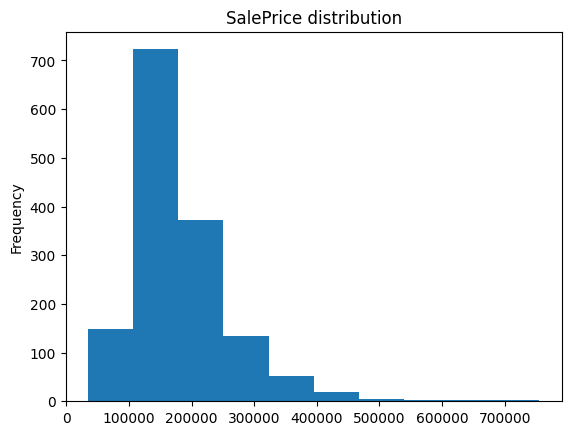

In [2028]:
# Take a look at "SalePrice" distribution
df__nwengineeredtrain1["SalePrice"].plot(kind="hist", title="SalePrice distribution")

In [2029]:
# Take a look at "SalePrice" distribution
df__nwengineeredtrain1["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<div style="background-color: green; padding: 10px;">
"SalePrice" distribution is right-skewed : some high values are present after the third quartile. We will apply some transformations to correct the skewness.
</div>

<Axes: title={'center': 'SalePrice Logarithmic distribution'}, ylabel='Frequency'>

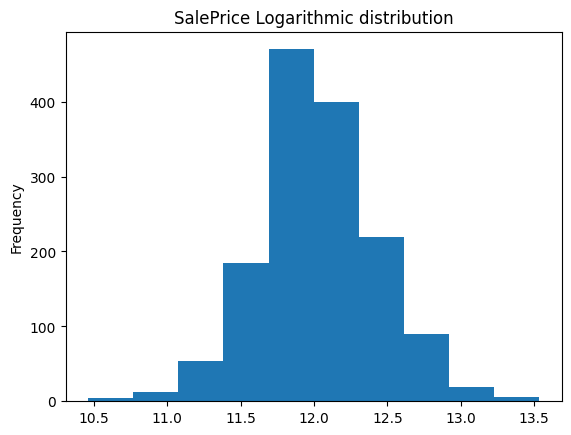

In [2030]:
# Take a look at "SalePrice" Logarithmic distribution
df__nwengineeredtrain1["SalePrice"].apply(lambda x: np.log(x)).plot(kind="hist", title="SalePrice Logarithmic distribution")

In [2031]:
# Take a look at "SalePrice" Logarithmic distribution
df__nwengineeredtrain1["SalePrice"].apply(lambda x: np.log(x)).describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<div style="background-color: green; padding: 10px;">
Using logarithmic transformation, we're able to correct the skewness of "SalePrice" distribution : we will be using this logarithmic version when proceeding further.
</div>

In [2032]:
# Cleanup
df__nwengineeredtrain1["LogSalePrice"] = df__nwengineeredtrain1["SalePrice"].apply(lambda x: np.log(x))
df__nwengineeredtrain2["LogSalePrice"] = df__nwengineeredtrain2["SalePrice"].apply(lambda x: np.log(x))
del df__nwengineeredtrain1["SalePrice"], df__nwengineeredtrain2["SalePrice"]

#### 7. Model the target LogSalePrice

##### *7.1. Try a multiple linear regression*

In [2033]:
# Instantiate two linear regression objects
ridge__object1 = Ridge(random_state=123, alpha=0.3)
ridge__object2 = Ridge(random_state=123, alpha=0.3)

# Fit ridge__object1 on PCA components and examine results

# Do not forget to split your training samples into two parts to evaluate your model real performance
array__Xtrain, array__Xval, array__ytrain, array__yval = train_test_split(np.array(df__nwengineeredtrain1[list__nwhighcovariates]), np.array(df__nwengineeredtrain1["LogSalePrice"]), test_size=0.2, random_state=123)

print("___________________________\n")
print("Using PCA components :")
print("On train :")

ridge__object1.fit(X=array__Xtrain, y=array__ytrain)

print(f" - We're able to explain {100*ridge__object1.score(X=array__Xtrain, y=array__ytrain): .2f}% of 'LogScalePrice' variance.")
print(f" - The root mean squared error obtained on 'LogSalePrice' is up to {np.sqrt(mean_squared_error(y_pred=ridge__object1.predict(X=array__Xtrain), y_true=array__ytrain)): .5f}.")

print("On new data :")
print(f" - The root mean squared error obtained on 'LogSalePrice' is up to {np.sqrt(mean_squared_error(y_pred=ridge__object1.predict(X=array__Xval), y_true=array__yval)): .5f}.")

# Fit ridge__object2 on SparsePCA components and examine results

# Do not forget to split your training samples into two parts to evaluate your model real performance
array__Xtrain, array__Xval, array__ytrain, array__yval = train_test_split(np.array(df__nwengineeredtrain2[list__nwhighcovariates]), np.array(df__nwengineeredtrain2["LogSalePrice"]), test_size=0.2, random_state=123)

print("\n___________________________\n")
print("Using SparsePCA components : ")
print("On train : ")

ridge__object2.fit(X=array__Xtrain, y=array__ytrain)

print(f" - We're able to explain {100*ridge__object2.score(X=array__Xtrain, y=array__ytrain): .2f}% of 'LogScalePrice' variance.")
print(f" - The root mean squared error obtained on 'LogSalePrice' is up to {np.sqrt(mean_squared_error(y_pred=ridge__object2.predict(X=array__Xtrain), y_true=array__ytrain)): .5f}.")

print("On new data : ")
print(f" - The root mean squared error obtained on 'LogSalePrice' is up to {np.sqrt(mean_squared_error(y_pred=ridge__object2.predict(X=array__Xval), y_true=array__yval)): .5f}.")

# Cleanup
del array__Xtrain, array__Xval, array__ytrain, array__yval

___________________________

Using PCA components :
On train :
 - We're able to explain  88.21% of 'LogScalePrice' variance.
 - The root mean squared error obtained on 'LogSalePrice' is up to  0.13827.
On new data :
 - The root mean squared error obtained on 'LogSalePrice' is up to  0.12175.

___________________________

Using SparsePCA components : 
On train : 
 - We're able to explain  88.21% of 'LogScalePrice' variance.
 - The root mean squared error obtained on 'LogSalePrice' is up to  0.13827.
On new data : 
 - The root mean squared error obtained on 'LogSalePrice' is up to  0.12174.


<div style="background-color: green; padding: 10px;">
Using a linear regression model based on PCA or SparsePCA components, we're able to explain 88.21% of "LogSalePrice" variance, and we can expect to produce a similar error of prediction of 0.13827 for any new data.
</div>

In [2034]:
# Cleanup
del ridge__object2

##### *7.2. Try a random forest*

In [2035]:
# Instantiate two random forest regressor objects
rf__object1 = RandomForestRegressor(n_estimators=200, random_state=123, max_depth=3)
rf__object2 = RandomForestRegressor(n_estimators=100, random_state=123, min_samples_split=20, max_features=0.2, max_depth=3)

# Fit rf__object1 on PCA components and examine results

# Do not forget to split your training samples into two parts to evaluate your model real performance
array__Xtrain, array__Xval, array__ytrain, array__yval = train_test_split(np.array(df__nwengineeredtrain1[list__nwhighcovariates]), np.array(df__nwengineeredtrain1["LogSalePrice"]), test_size=0.2, random_state=123)

print("___________________________\n")
print("Using PCA components :")
print("On train :")

rf__object1.fit(X=array__Xtrain, y=array__ytrain)

print(f" - We're able to explain {100*rf__object1.score(X=array__Xtrain, y=array__ytrain): .2f}% of 'LogScalePrice' variance.")
print(f" - The root mean squared error obtained on 'LogSalePrice' is up to {np.sqrt(mean_squared_error(y_pred=rf__object1.predict(X=array__Xtrain), y_true=array__ytrain)): .5f}.")

print("On new data :")
print(f" - The root squared error obtained on 'LogSalePrice' is up to {np.sqrt(mean_squared_error(y_pred=rf__object1.predict(X=array__Xval), y_true=array__yval)): .5f}.")

# Fit rf__object2 on SparsePCA components and examine results

# Do not forget to split your training samples into two parts to evaluate your model real performance
array__Xtrain, array__Xval, array__ytrain, array__yval = train_test_split(np.array(df__nwengineeredtrain2[list__nwhighcovariates]), np.array(df__nwengineeredtrain2["LogSalePrice"]), test_size=0.2, random_state=123)

print("\n___________________________\n")
print("Using SparsePCA components : ")
print("On train : ")

rf__object2.fit(X=array__Xtrain, y=array__ytrain)

print(f" - We're able to explain {100*rf__object2.score(X=array__Xtrain, y=array__ytrain): .2f}% of 'LogScalePrice' variance.")
print(f" - The root mean squared error obtained on 'LogSalePrice' is up to {np.sqrt(mean_squared_error(y_pred=rf__object2.predict(X=array__Xtrain), y_true=array__ytrain)): .5f}.")

print("On new data : ")
print(f" - The root mean squared error obtained on 'LogSalePrice' is up to {np.sqrt(mean_squared_error(y_pred=rf__object2.predict(X=array__Xval), y_true=array__yval)): .5f}.")

# Cleanup
del array__Xtrain, array__Xval, array__ytrain, array__yval

___________________________

Using PCA components :
On train :
 - We're able to explain  78.86% of 'LogScalePrice' variance.
 - The root mean squared error obtained on 'LogSalePrice' is up to  0.18515.
On new data :
 - The root squared error obtained on 'LogSalePrice' is up to  0.17774.

___________________________

Using SparsePCA components : 
On train : 
 - We're able to explain  78.20% of 'LogScalePrice' variance.
 - The root mean squared error obtained on 'LogSalePrice' is up to  0.18804.
On new data : 
 - The root mean squared error obtained on 'LogSalePrice' is up to  0.18369.


<div style="background-color: green; padding: 10px;">

- To avoid overfitting, we calibrated our random forest parameters such that we're only able to explain 78.86% of 'LogSalePrice' variance, but the mean squared error expected on new data can be up to 0.18054 which is a little higher than what a linear regression model can provide us.

- It seems that using non linear models won't give better results than those given by a linear one.
</div>

In [2036]:
# Cleanup
del rf__object1, rf__object2

##### *7.3. Try a gradient boosting regressor*

In [2037]:
# Set linear gradient boosting parameters
dict__params = {
    "booster": "gbtree", "objective": "reg:squarederror", "learning_rate": 0.05, "lambda": 1, "random_state": 123, "max_depth": 3}

# Fit xgb__object on PCA components, and examine results

# Do not forget to split your training samples into two parts to evaluate your model real performance
array__Xtrain, array__Xval, array__ytrain, array__yval = train_test_split(np.array(df__nwengineeredtrain1[list__nwhighcovariates]), np.array(df__nwengineeredtrain1["LogSalePrice"]), test_size=0.2, random_state=123)

# Create DMatrix objects
matrix__Xtrain = xgb.DMatrix(array__Xtrain, label=array__ytrain)
matrix__Xval = xgb.DMatrix(array__Xval, label=array__yval)

# Instantiate a gradient boosting regressor
xgb__object = xgb.train(dict__params, matrix__Xtrain, num_boost_round=100)

print("___________________________\n")
print("Using PCA components :")

print("On train :")
print(f" - The root mean squared error obtained on 'LogSalePrice' is up to {np.sqrt(mean_squared_error(y_pred=xgb__object.predict(matrix__Xtrain), y_true=array__ytrain)): .5f}.")

print("On new data :")
print(f" - The root mean squared error obtained on 'LogSalePrice' is up to {np.sqrt(mean_squared_error(y_pred=xgb__object.predict(matrix__Xval), y_true=array__yval)): .5f}.")

# Cleanup
del array__Xtrain, array__Xval, array__ytrain, array__yval, matrix__Xtrain, matrix__Xval, dict__params

___________________________

Using PCA components :
On train :
 - The root mean squared error obtained on 'LogSalePrice' is up to  0.11882.
On new data :
 - The root mean squared error obtained on 'LogSalePrice' is up to  0.14438.


In [2038]:
# Cleanup
del xgb__object

<div style="background-color: green; padding: 10px;">
Even applying gradient boosting method on trees wasn't able to give us more intersting results than what given by a simple linear model.
</div>


#### 8. Predict the target "SalePrice" for the test set

In [2039]:
# Use the gradient boostign mdoel to predict houses prices for testing samples
df__test["SalePrice"] = np.exp(ridge__object1.predict(np.array(df__nwengineeredtest1[list__nwhighcovariates])))

# Save results
df__test[["Id", "SalePrice"]].to_csv(path_or_buf=windowspath__data / "test" / "test_pred.csv", index=False)

In [2040]:
gc.collect()
%reset -f